# Manifold Learning

<h3><span style="color:blue">
NOTE:
In this code, all inputs and outputs are <i>column vectors</i>.<br/>
</span></h3>

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## ======== Multidimensional Scaling ============

In [2]:
from sklearn.metrics.pairwise import euclidean_distances

# Helper functions & Datasets
from Code.optimization import conjugate_gradient, gradient_descent
from Code.dataset import tetrahedron, airline_dist, synthetic_spiral

## * Classical MDS

### <span style="color:red">============= Assignment 1 =============</span>
<span style="color:red">
    Complete the function, <b>cmds</b>, for classical mds and run the code with the datasets (tentrahedron, airline distance)
</span>

In [3]:
def cmds(X, n_dim, input_type='raw'):
    """
    Classical(linear) multidimensional scaling (MDS)
    
    Parameters
    ----------
    X: (d, n) array or (n,n) array
        input data. The data are placed in column-major order. 
        That is, samples are placed in the matrix (X) as column vectors
        d: dimension of points
        n: number of points
        
    n_dim: dimension of target space
    
    input_type: it indicates whether data are raw or distance
        - raw: raw data. (n,d) array. 
        - distance: precomputed distances between the data. (n,n) array.
    Returns
    -------
    Y: (n_dim, n) array. projected embeddings .
    evals: eigen values
    evecs: corresponding eigen vectors in column vectors
    """

    if input_type == 'distance':
        D = X
    elif input_type == 'raw':
        Xt = X.T
        D = euclidean_distances(Xt,Xt)

  
   # Number of points
    n = len(D)

    # Centering matrix
    # 1.Get the column vector e = [1,1,…,1].T
    e = np.ones((n,1))
    # 2.Get the matrix H
    H = np.identity(n) - np.dot(e, e.T) / n

    # (double centering) - Gram matrix
    # 1.Get the square of D
    D_square = D ** 2
    # 2.Get the Gram matrix
    G = -1/2 * np.dot(H, np.dot(D_square, H))

    # Calculate eigen values and eigen vectors
    # Spectral decomposition on G
    eig_val, eig_vec = np.linalg.eigh(G)
    
    # Sort by eigenvalue in descending order
    # 1.Get the index of the feature vectors sorted from largest to smallest
    sorted_idx = np.argsort(-eig_val)
    # 2.Sort the eigenvalue in descending order
    evals = eig_val[sorted_idx]
    # 3.Sort the corresponding eigenvectors
    evecs = eig_vec[:, sorted_idx]

    # Compute the coordinates using positive-eigenvalued components only
    # 1. Extract all positive numbers
    evals = evals[evals > 0]
    pos_idx = len(evals)
    evecs = evecs[:, :pos_idx]
    # 2.Compute the coordinates
    # z*
    Y = np.dot(np.diag(evals) ** 1/2, evecs.T)
    

    return Y[:n_dim,:], evals[:n_dim], evecs[:,:n_dim]

#### Tetrahedron example (<span style="color:red">part of assignment 1</span>)

<span style="color:red">
    <h4>Print the 3-largest eigen values and its correspoint eigen vectors. </h4>
 You may get the answers which are similar to the follows. <br/><br/>
 The eigen vectors can be different from the proposed answer, but the eigenvalues should be the same.<br/>
 3-largest eigen values: <br/>
 [0.5 0.5 0.5] <br/>
 Corresponding eigen vectors: <br/>
 [[ 0.642617   -0.21226492 -0.68919373  0.25884166] <br/>
 [-0.58000376  0.15992816 -0.31426501  0.73434061] <br/>
 [ 0.02527916 -0.82423697  0.4198208   0.37913701]] <br/>
</span>

In [4]:
tetra_dist = tetrahedron()

n_dim = 3
Y_tetra, evals, evecs = cmds(X=tetra_dist, n_dim=n_dim, input_type='distance')
print('%d-largest eigen values:'% n_dim)
print(evals)
print('Corresponding eigen vectors:\n', evecs.T)

3-largest eigen values:
[0.5 0.5 0.5]
Corresponding eigen vectors:
 [[-0.01740518 -0.19912446 -0.57606111  0.79259075]
 [ 0.86508759 -0.25930798 -0.3240837  -0.28169591]
 [ 0.03633895 -0.80194066  0.55957426  0.20602745]]


<IPython.core.display.Javascript object>


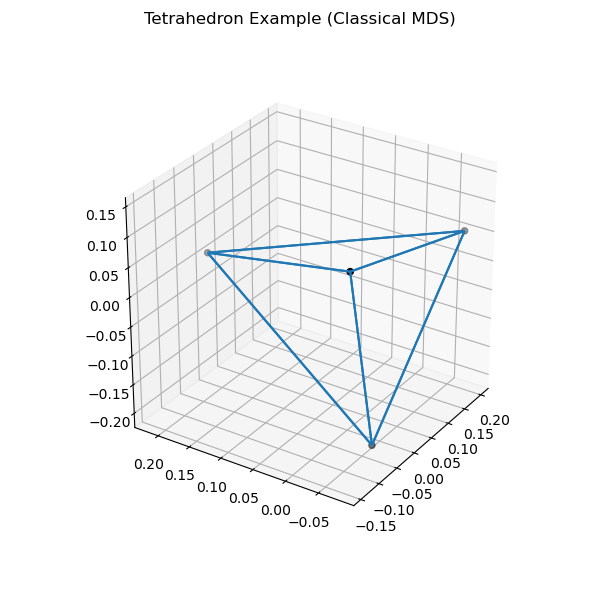

In [5]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

fig_tetra = plt.figure(figsize=(6,6))
fig_tetra.suptitle('Tetrahedron Example (Classical MDS)')
n_pts = Y_tetra.shape[1]
segments = [[Y_tetra[:, i], Y_tetra[:, j]]
        for i in range(n_pts) for j in range(n_pts)]
lc = Line3DCollection(segments,
                zorder=0, cmap=plt.cm.Blues)

ax_tetra = fig_tetra.add_subplot(111, projection='3d')
ax_tetra.scatter(Y_tetra[0,:], Y_tetra[1,:], Y_tetra[2,:], c='k')
ax_tetra.add_collection(lc)
ax_tetra.view_init(29,-147)
ax_tetra.axis('tight');

#### Airline distance Example (<span style="color:red">part of assignment 1</span>)

In [6]:
flying_dist, city = airline_dist()
flying_dist = flying_dist + flying_dist.T

<span style="color:red">
    <h4>Print the 2-largest eigen values and its correspoint eigen vectors.</h4> 
 
 You may get the answers which are similar to the follows. <br/>
 The eigen vectors can be different from the proposed answer, but the eigenvalues should be the same.<br/>
    The eigen vectors have a form of <b>column vector</b>. <br/><br/>
 2-largest eigen values: <br/>
     [4.70997250e+08 3.16544687e+08] <br/><br/>
 Corresponding eigen vectors: <br/>
 [[-0.24499395  0.07171063] <br/>
 [-0.00248515 -0.50378674] <br/>
 [-0.32317913  0.01696098] <br/>
 [-0.04479781  0.48743804] <br/>
 [ 0.14582995 -0.14302017] <br/>
 [-0.3668576   0.12562376] <br/>
 [ 0.28095925  0.27457247] <br/>
 [ 0.27210441  0.11511931] <br/>
 [ 0.01060597 -0.13231822] <br/>
 [-0.20779399 -0.19463378] <br/>
 [ 0.29184348  0.11733994] <br/>
 [ 0.14114669 -0.16226784] <br/>
 [ 0.36369516 -0.17396463] <br/>
 [ 0.10459427 -0.21892974] <br/>
 [ 0.13968383  0.35613124] <br/>
 [-0.37448819 -0.13954413] <br/>
 [ 0.07449426 -0.11091968] <br/>
 [-0.26036144  0.21448856]]
</span>

In [7]:
n_dim = 2
Y_2d_cmds, evals, evecs = cmds(flying_dist, n_dim, input_type='distance')
print('%d-largest eigen values:'% n_dim)
print(evals)
print('\nCorresponding eigen vectors:\n', evecs)

2-largest eigen values:
[4.70997250e+08 3.16544687e+08]

Corresponding eigen vectors:
 [[-0.24499395  0.07171063]
 [-0.00248515 -0.50378674]
 [-0.32317913  0.01696098]
 [-0.04479781  0.48743804]
 [ 0.14582995 -0.14302017]
 [-0.3668576   0.12562376]
 [ 0.28095925  0.27457247]
 [ 0.27210441  0.11511931]
 [ 0.01060597 -0.13231822]
 [-0.20779399 -0.19463378]
 [ 0.29184348  0.11733994]
 [ 0.14114669 -0.16226784]
 [ 0.36369516 -0.17396463]
 [ 0.10459427 -0.21892974]
 [ 0.13968383  0.35613124]
 [-0.37448819 -0.13954413]
 [ 0.07449426 -0.11091968]
 [-0.26036144  0.21448856]]


<IPython.core.display.Javascript object>


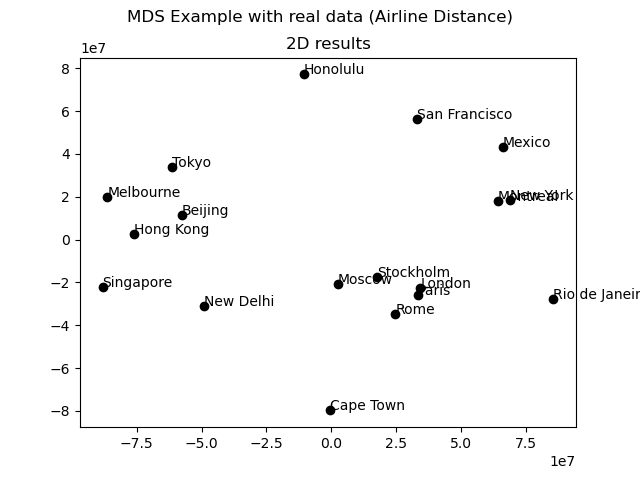

In [8]:
fig = plt.figure()
fig.suptitle('MDS Example with real data (Airline Distance)')

# 2d result
ax_2d = fig.add_subplot()
ax_2d.set_title('2D results')
ax_2d.scatter(Y_2d_cmds[0,:], Y_2d_cmds[1,:], c='k')
for i in range(len(city)):
    ax_2d.text(Y_2d_cmds[0,i], Y_2d_cmds[1,i], city[i])
ax_2d.axis('tight');

### <span style="color:red">=========== End of Assignment 1 ===========</span>

## * Stress-based MDS
### Trade-off (Sammon mapping)

In [9]:
def loss_sammon(D, y):
    """
    Loss function (stress) - Sammon
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symetric matrix
    y: (d,n) array
        d is the dimensionality of target space.
        n is the number of points.
        
    Returns
    -------
    stress: scalar. stress
    """
    n, N = y.shape
    
    # calculate distances in target space
    y_t = y.T
    d = euclidean_distances(y_t, y_t)
    
    # add I to the denominator to avoid division by zero
    Dinv = 1. / (D + np.eye(N))
    
    scale = 1 / D.sum()
    delta = d - D
    stress = scale * ((delta**2)*Dinv).sum()
    return stress

def grad_sammon(D, y):
    """
    Gradient function (first derivative) - Sammonn_dim
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symetric matrix
    y: (d,n) array
        d is the dimensionality of target space.
        n is the number of points.
        
    Returns
    -------
    g: (k,n) array.
        Gradient matrix. 
        k is the dimensionality of target space.
        n is the number of points.
    """
    n, N = y.shape
    
    # calculate distances in target space
    y_t = y.T
    d = euclidean_distances(y_t, y_t)
        
    scale = 2 / D.sum()
    one = np.ones([n,N])
    
    # add I to the denominator to avoid division by zero
    Dinv = 1 / (D+np.eye(N))
    dinv = 1 / (d+np.eye(N))
    
    delta = (d - D) * Dinv * dinv
    deltaone = np.dot(one,delta)
    g = ((y * deltaone) - np.dot(y,delta)) # gradient
    g = 2 * scale * g
    return g

### <span style="color:red">============= Assignment 2 =============</span>
<span style="color:red">
    Complete the loss functions (<b>loss_abs, grad_abs, loss_rel, grad_rel</b>) for stress-based MDS
</span>

#### <span style="color:red">Absolute Error</span>

In [10]:
def loss_abs(D, y):
    """
    Loss function (stress) - Absolute Error 
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symetric matrix
    y: (d,n) array
        d is the dimensionality of target space
        n is the number of points
        
    Returns
    -------
    stress: scalar. stress
    """
    
    n, N = y.shape 
    
    # calculate distances in target space
    # In sklearn rows stand for instances.
    y_t = y.T
    d = euclidean_distances(y_t, y_t)
    
    # calculate stress
    delta = d - D
  
    Dinv = 1. / (D ** 2).sum()
    stress = ((delta ** 2)).sum() * Dinv
       
    return stress

In [11]:
def grad_abs(D, y):
    """
    Gradient function (first derivative) - Absolute Error
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symetric matrix
    y: (d,n) array
        d is the dimensionality of target space
        n is the number of points
        
    Returns
    -------
    g: (k,n) array.
        Gradient matrix. 
        k is the dimensionality of target space.
        n is the number of points.
    """
    
    n, N = y.shape
    
    # calculate distances in target space
    y_t = y.T
    d = euclidean_distances(y_t, y_t)
   
    # calculate gradient
    scale = 2 / (D ** 2).sum()
    one = np.ones([n,N])
    dinv = 1 / (d + np.eye(N))
    delta = (d - D) * dinv
    
    # 
    deltaone = np.dot(one,delta)
    g = ((y * deltaone) - np.dot(y,delta)) # gradient
    g = 2 * scale * g
    
    return g

#### <span style="color:red">Relative Error</span>

In [12]:
def loss_rel(D, y):
    """
    Loss function (stress) - Relative Error 
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symetric matrix
    y: (d,n) array
        d is the dimensionality of target space.
        n is the number of points
        
    Returns
    -------
    stress: scalar. stress
    """
    
    n, N = y.shape
    
    # calculate distances in target space
    y_t = y.T
    d = euclidean_distances(y_t, y_t)
    
    # calculate stress
    # add I to the denominator to avoid division by zero
    Dinv = 1. / (D + np.eye(N))
    delta = d - D
    stress = ((delta * Dinv) ** 2).sum()
       
    return stress

In [13]:
def grad_rel(D, y):
    """
    Gradient function (first derivative) - Relative Error
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symetric matrix
    y: (d,n) array
        d is the dimensionality of target space.
        n is the number of points
        
    Returns
    -------
    g: (k,n) array.
        Gradient matrix. 
        k is the dimensionality of target space.
        n is the number of points.
    """
    
    n, N = y.shape
    
    # calculate distances in target space
    y_t = y.T
    d = euclidean_distances(y_t, y_t)
   
    # calculate gradient
    scale = 2
    one = np.ones([n,N])
    
    # add I to the denominator to avoid division by zero
    Dinv = 1 / (D ** 2 + np.eye(N))
    dinv = 1 / (d + np.eye(N))
    
    delta = (d - D) * Dinv * dinv
    deltaone = np.dot(one,delta)
    g = ((y * deltaone) - np.dot(y,delta)) # gradient
    g = 2 * scale * g
    
    return g

### <span style="color:red">=========== End of Assignment 2 ===========</span>

In [14]:
def stress_based_mds(x, n_dim, loss_f, grad_f, input_type='raw', init='random', 
                     optim='cg', lr=0.5, tol=1e-9, max_iter=1000, init_value=None):
    """
    Stress-based MDS
    
    Parameters
    ----------
    x: (d,n) array or (n,n) array
        If it is raw data -> (d,n) array
        otherwise, (n,n) array (distance matrix)
        n is the number of points
        d is the dimensionality of original space
    n_dim: dimensionality of target space
    cost_f: cost function
    grad_f: gradient function
    input_type: 'raw' or 'distance'
    init: initialisation method
        random: Initial y is set randomly
        fixed: Initial y is set by pre-defined values
    max_iter: maximum iteration of optimization
    init_value: initial value of embedded coordinates.
    
    Returns:
    y: (n_dim,n) array. Embedded coordinates in target space
    """

    # obtain distance
    if input_type == 'raw':
        x_t = x.T
        D = euclidean_distances(x_t, x_t)
    elif input_type == 'distance':
        D = x
    else:
        raise ValueError('inappropriate input_type')
    
    # Remaining initialisation
    N = x.shape[1]

    '''
    ======================= Assignment 3 ===========================
    
    Add code snippets in order to use fixed initial values.
    You can choose the mode by "init" parameter.
        fixed: this means you use fixed initial values 
            which are contained in "init_value" parameter.
        random : this means you use random initialisation.
        
    You may take a form of code like 
        if init == 'fixed':
            .....
        else:
            .....
            
    '''
    # ==================== Assignment 3 ==============================
    # This is a part of assignment 3.
    # Modify this part to set y by init_value.
    
   
    # Initialise y randomly
    if init == 'random':
        y = np.random.normal(0.0,1.0,[n_dim,N])
    elif init == 'fixed':
        y = init_value
    # =================================================================

    # calculate optimal solution (embedded coordinates)
    if optim == 'cg': # conjugate gradient
        y = conjugate_gradient(D, y, loss_f, grad_f, max_iter)
    elif optim == 'gd': # gradient descent
        y = gradient_descent(D, y, loss_f, grad_f, lr, tol, max_iter)
    else:
        raise ValueError('inappropriate optim parameter')
    
    return y

### Example with synthetic data (3-D Spiral)

In [15]:
X_spiral = synthetic_spiral()

<IPython.core.display.Javascript object>


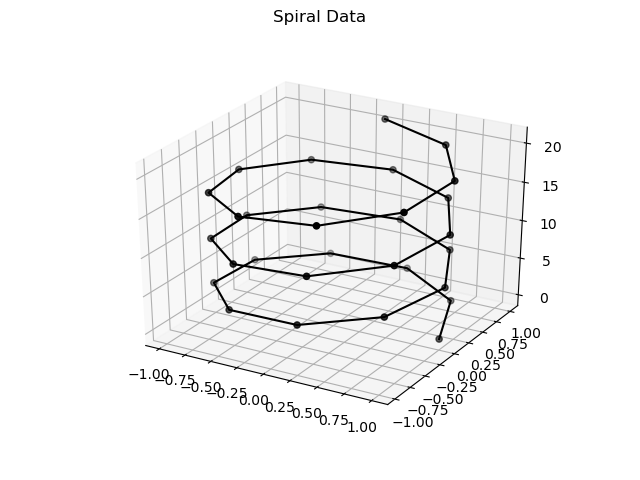

In [16]:
fig = plt.figure()
fig.suptitle('Spiral Data')

# Add 3d scatter plot
ax = fig.add_subplot(projection='3d')
ax.scatter(X_spiral[0,:], X_spiral[1,:], X_spiral[2,:], c='k')
ax.plot(X_spiral[0,:], X_spiral[1,:], X_spiral[2,:], c='k');

### Random Init.
Every time you run the cells related to random initialisation, you will get different results.

#### Map 3-D data onto 2-D using sammon's error

In [17]:
n_dim = 2
Y_sammon = stress_based_mds(X_spiral, n_dim, loss_sammon, grad_sammon)

Optimization terminated successfully.
         Current function value: 0.001046
         Iterations: 68
         Function evaluations: 387
         Gradient evaluations: 387


<IPython.core.display.Javascript object>


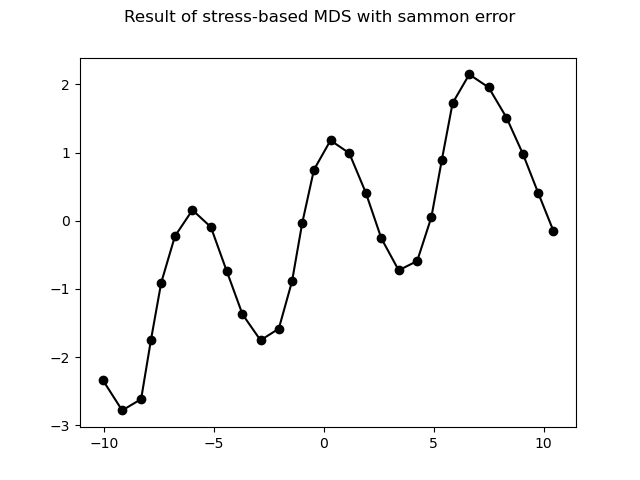

In [18]:
fig = plt.figure()
fig.suptitle('Result of stress-based MDS with sammon error')

ax = fig.add_subplot()
ax.scatter(Y_sammon[0,:], Y_sammon[1,:], c='k')
ax.plot(Y_sammon[0,:], Y_sammon[1,:], c='k')
ax.axis('tight');

#### <span style="color:red"> Map 3-D data onto 2-D using absolute error</span>

In [19]:
n_dim = 2
Y_abs = stress_based_mds(X_spiral, n_dim, loss_abs, grad_abs)

Optimization terminated successfully.
         Current function value: 0.000471
         Iterations: 26
         Function evaluations: 169
         Gradient evaluations: 169


<IPython.core.display.Javascript object>


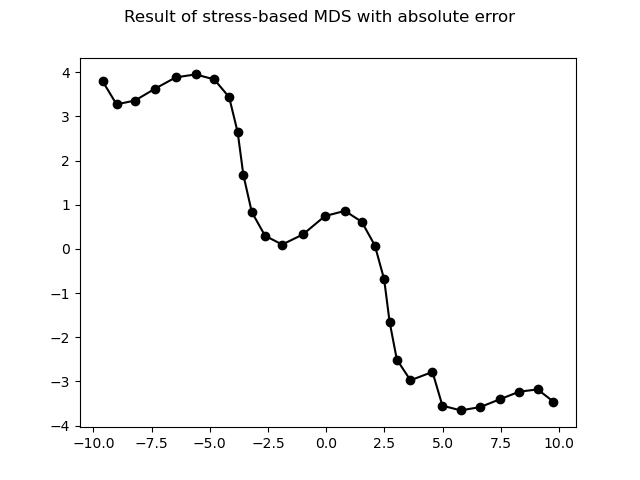

In [20]:
fig = plt.figure()
fig.suptitle('Result of stress-based MDS with absolute error')

ax = fig.add_subplot()
ax.scatter(Y_abs[0,:], Y_abs[1,:], c='k')
ax.plot(Y_abs[0,:], Y_abs[1,:], c='k')
ax.axis('tight');

#### <span style="color:red"> Map 3-D data onto 2-D using relative error</span>

In [21]:
n_dim = 2
Y_rel = stress_based_mds(X_spiral, n_dim, loss_rel, grad_rel)

Optimization terminated successfully.
         Current function value: 1.777722
         Iterations: 668
         Function evaluations: 1022
         Gradient evaluations: 1022


<IPython.core.display.Javascript object>


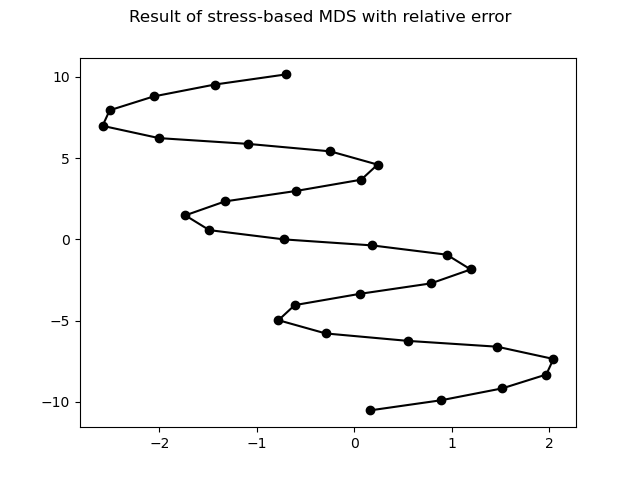

In [22]:
fig = plt.figure()
fig.suptitle('Result of stress-based MDS with relative error')

ax = fig.add_subplot()
ax.scatter(Y_rel[0,:], Y_rel[1,:], c='k')
ax.plot(Y_rel[0,:], Y_rel[1,:], c='k')
ax.axis('tight');

### Initialisation with fixed value

In [23]:
# fixed init. value
init_y_spiral = np.load('./Data/init_val_spiral.npz')['init']

#### Map 3-D data onto 2-D using sammon's mapping

In [24]:
n_dim = 2
Y_sammon_fixed = stress_based_mds(X_spiral, 
                                  n_dim, 
                                  loss_sammon, 
                                  grad_sammon, 
                                  optim='gd',
                                  lr=0.9,
                                  tol=1e-9,
                                  max_iter=50000,
                                  init='fixed', 
                                  init_value=init_y_spiral)

iter: 0, stress: 1.68e-02, stress variance : 4.61e-03
iter: 50, stress: 1.34e-02, stress variance : 4.42e-03
iter: 100, stress: 1.08e-02, stress variance : 4.24e-03
iter: 150, stress: 8.74e-03, stress variance : 4.04e-03
iter: 200, stress: 7.18e-03, stress variance : 3.81e-03
iter: 250, stress: 5.97e-03, stress variance : 3.54e-03
iter: 300, stress: 5.04e-03, stress variance : 3.23e-03
iter: 350, stress: 4.32e-03, stress variance : 2.90e-03
iter: 400, stress: 3.77e-03, stress variance : 2.55e-03
iter: 450, stress: 3.34e-03, stress variance : 2.22e-03
iter: 500, stress: 3.01e-03, stress variance : 1.91e-03
iter: 550, stress: 2.76e-03, stress variance : 1.64e-03
iter: 600, stress: 2.56e-03, stress variance : 1.39e-03
iter: 650, stress: 2.40e-03, stress variance : 1.18e-03
iter: 700, stress: 2.27e-03, stress variance : 1.01e-03
iter: 750, stress: 2.17e-03, stress variance : 8.63e-04
iter: 800, stress: 2.08e-03, stress variance : 7.42e-04
iter: 850, stress: 2.01e-03, stress variance : 6.44

iter: 7650, stress: 1.08e-03, stress variance : 1.35e-05
iter: 7700, stress: 1.08e-03, stress variance : 1.31e-05
iter: 7750, stress: 1.08e-03, stress variance : 1.27e-05
iter: 7800, stress: 1.08e-03, stress variance : 1.24e-05
iter: 7850, stress: 1.08e-03, stress variance : 1.20e-05
iter: 7900, stress: 1.08e-03, stress variance : 1.17e-05
iter: 7950, stress: 1.08e-03, stress variance : 1.13e-05
iter: 8000, stress: 1.08e-03, stress variance : 1.10e-05
iter: 8050, stress: 1.08e-03, stress variance : 1.06e-05
iter: 8100, stress: 1.08e-03, stress variance : 1.03e-05
iter: 8150, stress: 1.07e-03, stress variance : 1.00e-05
iter: 8200, stress: 1.07e-03, stress variance : 9.71e-06
iter: 8250, stress: 1.07e-03, stress variance : 9.41e-06
iter: 8300, stress: 1.07e-03, stress variance : 9.12e-06
iter: 8350, stress: 1.07e-03, stress variance : 8.84e-06
iter: 8400, stress: 1.07e-03, stress variance : 8.57e-06
iter: 8450, stress: 1.07e-03, stress variance : 8.30e-06
iter: 8500, stress: 1.07e-03, s

iter: 15150, stress: 1.05e-03, stress variance : 1.06e-06
iter: 15200, stress: 1.05e-03, stress variance : 1.06e-06
iter: 15250, stress: 1.05e-03, stress variance : 1.06e-06
iter: 15300, stress: 1.05e-03, stress variance : 1.06e-06
iter: 15350, stress: 1.05e-03, stress variance : 1.05e-06
iter: 15400, stress: 1.05e-03, stress variance : 1.05e-06
iter: 15450, stress: 1.05e-03, stress variance : 1.05e-06
iter: 15500, stress: 1.05e-03, stress variance : 1.05e-06
iter: 15550, stress: 1.05e-03, stress variance : 1.05e-06
iter: 15600, stress: 1.05e-03, stress variance : 1.04e-06
iter: 15650, stress: 1.05e-03, stress variance : 1.04e-06
iter: 15700, stress: 1.05e-03, stress variance : 1.04e-06
iter: 15750, stress: 1.05e-03, stress variance : 1.04e-06
iter: 15800, stress: 1.05e-03, stress variance : 1.04e-06
iter: 15850, stress: 1.05e-03, stress variance : 1.03e-06
iter: 15900, stress: 1.05e-03, stress variance : 1.03e-06
iter: 15950, stress: 1.05e-03, stress variance : 1.03e-06
iter: 16000, s

iter: 22600, stress: 1.05e-03, stress variance : 9.39e-07
iter: 22650, stress: 1.05e-03, stress variance : 9.39e-07
iter: 22700, stress: 1.05e-03, stress variance : 9.39e-07
iter: 22750, stress: 1.05e-03, stress variance : 9.39e-07
iter: 22800, stress: 1.05e-03, stress variance : 9.39e-07
iter: 22850, stress: 1.05e-03, stress variance : 9.39e-07
iter: 22900, stress: 1.05e-03, stress variance : 9.39e-07
iter: 22950, stress: 1.05e-03, stress variance : 9.39e-07
iter: 23000, stress: 1.05e-03, stress variance : 9.39e-07
iter: 23050, stress: 1.05e-03, stress variance : 9.39e-07
iter: 23100, stress: 1.05e-03, stress variance : 9.39e-07
iter: 23150, stress: 1.05e-03, stress variance : 9.39e-07
iter: 23200, stress: 1.05e-03, stress variance : 9.39e-07
iter: 23250, stress: 1.05e-03, stress variance : 9.39e-07
iter: 23300, stress: 1.05e-03, stress variance : 9.39e-07
iter: 23350, stress: 1.05e-03, stress variance : 9.39e-07
iter: 23400, stress: 1.05e-03, stress variance : 9.39e-07
iter: 23450, s

iter: 29950, stress: 1.04e-03, stress variance : 9.15e-07
iter: 30000, stress: 1.04e-03, stress variance : 9.14e-07
iter: 30050, stress: 1.04e-03, stress variance : 9.13e-07
iter: 30100, stress: 1.04e-03, stress variance : 9.12e-07
iter: 30150, stress: 1.04e-03, stress variance : 9.11e-07
iter: 30200, stress: 1.04e-03, stress variance : 9.10e-07
iter: 30250, stress: 1.04e-03, stress variance : 9.09e-07
iter: 30300, stress: 1.04e-03, stress variance : 9.08e-07
iter: 30350, stress: 1.04e-03, stress variance : 9.07e-07
iter: 30400, stress: 1.04e-03, stress variance : 9.06e-07
iter: 30450, stress: 1.04e-03, stress variance : 9.05e-07
iter: 30500, stress: 1.04e-03, stress variance : 9.03e-07
iter: 30550, stress: 1.04e-03, stress variance : 9.02e-07
iter: 30600, stress: 1.04e-03, stress variance : 9.01e-07
iter: 30650, stress: 1.04e-03, stress variance : 9.00e-07
iter: 30700, stress: 1.04e-03, stress variance : 8.99e-07
iter: 30750, stress: 1.04e-03, stress variance : 8.98e-07
iter: 30800, s

iter: 37150, stress: 1.03e-03, stress variance : 5.73e-07
iter: 37200, stress: 1.03e-03, stress variance : 5.69e-07
iter: 37250, stress: 1.03e-03, stress variance : 5.66e-07
iter: 37300, stress: 1.03e-03, stress variance : 5.63e-07
iter: 37350, stress: 1.03e-03, stress variance : 5.59e-07
iter: 37400, stress: 1.03e-03, stress variance : 5.56e-07
iter: 37450, stress: 1.03e-03, stress variance : 5.53e-07
iter: 37500, stress: 1.03e-03, stress variance : 5.49e-07
iter: 37550, stress: 1.03e-03, stress variance : 5.46e-07
iter: 37600, stress: 1.03e-03, stress variance : 5.43e-07
iter: 37650, stress: 1.03e-03, stress variance : 5.39e-07
iter: 37700, stress: 1.03e-03, stress variance : 5.36e-07
iter: 37750, stress: 1.03e-03, stress variance : 5.33e-07
iter: 37800, stress: 1.03e-03, stress variance : 5.29e-07
iter: 37850, stress: 1.03e-03, stress variance : 5.26e-07
iter: 37900, stress: 1.03e-03, stress variance : 5.23e-07
iter: 37950, stress: 1.03e-03, stress variance : 5.19e-07
iter: 38000, s

iter: 44300, stress: 1.03e-03, stress variance : 2.03e-07
iter: 44350, stress: 1.03e-03, stress variance : 2.02e-07
iter: 44400, stress: 1.03e-03, stress variance : 2.00e-07
iter: 44450, stress: 1.03e-03, stress variance : 1.99e-07
iter: 44500, stress: 1.03e-03, stress variance : 1.97e-07
iter: 44550, stress: 1.03e-03, stress variance : 1.96e-07
iter: 44600, stress: 1.03e-03, stress variance : 1.95e-07
iter: 44650, stress: 1.03e-03, stress variance : 1.93e-07
iter: 44700, stress: 1.03e-03, stress variance : 1.92e-07
iter: 44750, stress: 1.03e-03, stress variance : 1.91e-07
iter: 44800, stress: 1.03e-03, stress variance : 1.89e-07
iter: 44850, stress: 1.03e-03, stress variance : 1.88e-07
iter: 44900, stress: 1.03e-03, stress variance : 1.87e-07
iter: 44950, stress: 1.03e-03, stress variance : 1.85e-07
iter: 45000, stress: 1.03e-03, stress variance : 1.84e-07
iter: 45050, stress: 1.03e-03, stress variance : 1.83e-07
iter: 45100, stress: 1.03e-03, stress variance : 1.81e-07
iter: 45150, s

<IPython.core.display.Javascript object>


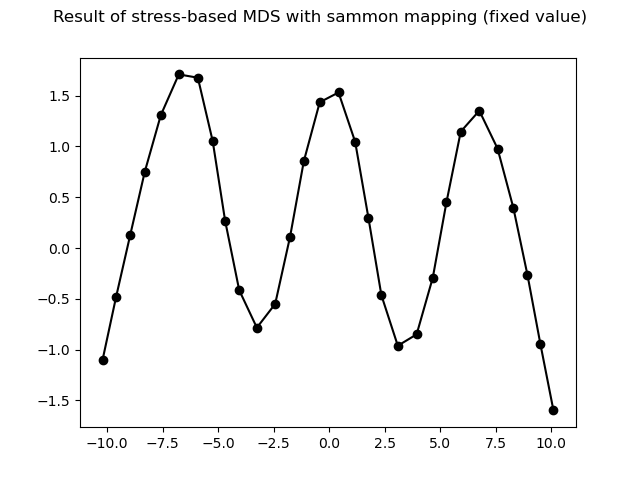

In [25]:
fig = plt.figure()
fig.suptitle('Result of stress-based MDS with sammon mapping (fixed value)')

ax = fig.add_subplot()
ax.scatter(Y_sammon_fixed[0,:], Y_sammon_fixed[1,:], c='k')
ax.plot(Y_sammon_fixed[0,:], Y_sammon_fixed[1,:], c='k')
ax.axis('tight');

### <span style="color:red">=========== Assignment 3 ===========</span>
<h4>
    <span style="color:red">Run the cells below with fixed initial values.</span>
</h4> <br/>
<span style="color:red">
    1. <b>Add code snippets to set the initial y with fixed values.</b> You can do this by modifying the initialisation part of the <b>stress_based_mds</b> function. <br/>
    2. Run the cells below with the given initial values (<b>init_val_y_spiral</b> for the spiral example, <b>init_val_y_airline_2d, init_val_y_airline_3d</b> for the airline distance example). <br/>
</span>

<br/>
<span style="color:red">
    <b>NOTE:</b>
You will get similar results from the three kinds of the loss functions. Moreover, you will get consistent results from every execution.
</span>

#### <span style="color:red">Map 3-D data onto 2-D using absolute error</span>

### Way to find the best parameters

In this assignment, we should use appropriate parameters to make gradient descent.

According to the source code, the 'tol' here is a threshold, if stress_var is less than this threshold, it will stop.

When I find appropriate learning rate, I did not use tol and let the code run 50000 times.

The **method** I used to find appropriate learning rate is:

1. Run the code with the initial learning rate(0.9) and record the loss(is stress here) value.
2. Adjust the parameter to see if the stress drops.
3. Narrow range of parameters to find the optimal value.
4. When the stress is the same, choose a value with fewer iterations.

In [26]:
# Run this example with gradient descent optimisation.
# It is quite slow, so you need to control hyper-parameters.
# For the usage, please refer to the example of sammon's mapping which is located below

n_dim = 2

# complete this part with the function, stress_based_mds().
# use optim='gd'
# "Way to find the best parameters" is shown above for the reason that lr=0.9.
Y_abs_fixed = stress_based_mds(X_spiral, 
                                n_dim, 
                                loss_abs,
                                grad_abs,
                                init='fixed',
                                lr=0.9,
                                tol=1e-9,
                                optim='gd',
                                max_iter=50000,
                                init_value=init_y_spiral)

iter: 0, stress: 7.46e-03, stress variance : 2.40e-03
iter: 50, stress: 6.62e-03, stress variance : 2.37e-03
iter: 100, stress: 5.89e-03, stress variance : 2.34e-03
iter: 150, stress: 5.24e-03, stress variance : 2.31e-03
iter: 200, stress: 4.67e-03, stress variance : 2.28e-03
iter: 250, stress: 4.17e-03, stress variance : 2.24e-03
iter: 300, stress: 3.73e-03, stress variance : 2.20e-03
iter: 350, stress: 3.34e-03, stress variance : 2.16e-03
iter: 400, stress: 3.00e-03, stress variance : 2.11e-03
iter: 450, stress: 2.71e-03, stress variance : 2.06e-03
iter: 500, stress: 2.44e-03, stress variance : 2.00e-03
iter: 550, stress: 2.22e-03, stress variance : 1.93e-03
iter: 600, stress: 2.02e-03, stress variance : 1.86e-03
iter: 650, stress: 1.84e-03, stress variance : 1.78e-03
iter: 700, stress: 1.69e-03, stress variance : 1.70e-03
iter: 750, stress: 1.55e-03, stress variance : 1.61e-03
iter: 800, stress: 1.44e-03, stress variance : 1.52e-03
iter: 850, stress: 1.33e-03, stress variance : 1.43

iter: 7500, stress: 4.60e-04, stress variance : 3.14e-05
iter: 7550, stress: 4.59e-04, stress variance : 3.12e-05
iter: 7600, stress: 4.58e-04, stress variance : 3.10e-05
iter: 7650, stress: 4.57e-04, stress variance : 3.09e-05
iter: 7700, stress: 4.57e-04, stress variance : 3.07e-05
iter: 7750, stress: 4.56e-04, stress variance : 3.05e-05
iter: 7800, stress: 4.55e-04, stress variance : 3.04e-05
iter: 7850, stress: 4.55e-04, stress variance : 3.02e-05
iter: 7900, stress: 4.54e-04, stress variance : 3.01e-05
iter: 7950, stress: 4.53e-04, stress variance : 2.99e-05
iter: 8000, stress: 4.53e-04, stress variance : 2.98e-05
iter: 8050, stress: 4.52e-04, stress variance : 2.96e-05
iter: 8100, stress: 4.51e-04, stress variance : 2.95e-05
iter: 8150, stress: 4.51e-04, stress variance : 2.93e-05
iter: 8200, stress: 4.50e-04, stress variance : 2.92e-05
iter: 8250, stress: 4.49e-04, stress variance : 2.90e-05
iter: 8300, stress: 4.49e-04, stress variance : 2.89e-05
iter: 8350, stress: 4.48e-04, s

iter: 14850, stress: 3.89e-04, stress variance : 1.62e-05
iter: 14900, stress: 3.89e-04, stress variance : 1.61e-05
iter: 14950, stress: 3.88e-04, stress variance : 1.61e-05
iter: 15000, stress: 3.88e-04, stress variance : 1.60e-05
iter: 15050, stress: 3.88e-04, stress variance : 1.59e-05
iter: 15100, stress: 3.87e-04, stress variance : 1.59e-05
iter: 15150, stress: 3.87e-04, stress variance : 1.58e-05
iter: 15200, stress: 3.87e-04, stress variance : 1.57e-05
iter: 15250, stress: 3.86e-04, stress variance : 1.57e-05
iter: 15300, stress: 3.86e-04, stress variance : 1.56e-05
iter: 15350, stress: 3.86e-04, stress variance : 1.55e-05
iter: 15400, stress: 3.85e-04, stress variance : 1.54e-05
iter: 15450, stress: 3.85e-04, stress variance : 1.54e-05
iter: 15500, stress: 3.85e-04, stress variance : 1.53e-05
iter: 15550, stress: 3.85e-04, stress variance : 1.52e-05
iter: 15600, stress: 3.84e-04, stress variance : 1.52e-05
iter: 15650, stress: 3.84e-04, stress variance : 1.51e-05
iter: 15700, s

iter: 22300, stress: 3.57e-04, stress variance : 7.32e-06
iter: 22350, stress: 3.57e-04, stress variance : 7.28e-06
iter: 22400, stress: 3.57e-04, stress variance : 7.23e-06
iter: 22450, stress: 3.57e-04, stress variance : 7.18e-06
iter: 22500, stress: 3.56e-04, stress variance : 7.14e-06
iter: 22550, stress: 3.56e-04, stress variance : 7.09e-06
iter: 22600, stress: 3.56e-04, stress variance : 7.04e-06
iter: 22650, stress: 3.56e-04, stress variance : 7.00e-06
iter: 22700, stress: 3.56e-04, stress variance : 6.95e-06
iter: 22750, stress: 3.56e-04, stress variance : 6.90e-06
iter: 22800, stress: 3.56e-04, stress variance : 6.86e-06
iter: 22850, stress: 3.56e-04, stress variance : 6.81e-06
iter: 22900, stress: 3.55e-04, stress variance : 6.77e-06
iter: 22950, stress: 3.55e-04, stress variance : 6.72e-06
iter: 23000, stress: 3.55e-04, stress variance : 6.68e-06
iter: 23050, stress: 3.55e-04, stress variance : 6.63e-06
iter: 23100, stress: 3.55e-04, stress variance : 6.59e-06
iter: 23150, s

iter: 29700, stress: 3.45e-04, stress variance : 2.43e-06
iter: 29750, stress: 3.45e-04, stress variance : 2.41e-06
iter: 29800, stress: 3.45e-04, stress variance : 2.39e-06
iter: 29850, stress: 3.45e-04, stress variance : 2.37e-06
iter: 29900, stress: 3.45e-04, stress variance : 2.35e-06
iter: 29950, stress: 3.45e-04, stress variance : 2.33e-06
iter: 30000, stress: 3.45e-04, stress variance : 2.32e-06
iter: 30050, stress: 3.45e-04, stress variance : 2.30e-06
iter: 30100, stress: 3.45e-04, stress variance : 2.28e-06
iter: 30150, stress: 3.45e-04, stress variance : 2.26e-06
iter: 30200, stress: 3.45e-04, stress variance : 2.24e-06
iter: 30250, stress: 3.45e-04, stress variance : 2.23e-06
iter: 30300, stress: 3.45e-04, stress variance : 2.21e-06
iter: 30350, stress: 3.45e-04, stress variance : 2.19e-06
iter: 30400, stress: 3.45e-04, stress variance : 2.17e-06
iter: 30450, stress: 3.45e-04, stress variance : 2.16e-06
iter: 30500, stress: 3.45e-04, stress variance : 2.14e-06
iter: 30550, s

iter: 37050, stress: 3.42e-04, stress variance : 8.00e-07
iter: 37100, stress: 3.42e-04, stress variance : 7.94e-07
iter: 37150, stress: 3.42e-04, stress variance : 7.89e-07
iter: 37200, stress: 3.42e-04, stress variance : 7.84e-07
iter: 37250, stress: 3.42e-04, stress variance : 7.79e-07
iter: 37300, stress: 3.42e-04, stress variance : 7.73e-07
iter: 37350, stress: 3.41e-04, stress variance : 7.68e-07
iter: 37400, stress: 3.41e-04, stress variance : 7.63e-07
iter: 37450, stress: 3.41e-04, stress variance : 7.58e-07
iter: 37500, stress: 3.41e-04, stress variance : 7.53e-07
iter: 37550, stress: 3.41e-04, stress variance : 7.48e-07
iter: 37600, stress: 3.41e-04, stress variance : 7.43e-07
iter: 37650, stress: 3.41e-04, stress variance : 7.38e-07
iter: 37700, stress: 3.41e-04, stress variance : 7.34e-07
iter: 37750, stress: 3.41e-04, stress variance : 7.29e-07
iter: 37800, stress: 3.41e-04, stress variance : 7.24e-07
iter: 37850, stress: 3.41e-04, stress variance : 7.19e-07
iter: 37900, s

iter: 44350, stress: 3.40e-04, stress variance : 3.56e-07
iter: 44400, stress: 3.40e-04, stress variance : 3.54e-07
iter: 44450, stress: 3.40e-04, stress variance : 3.53e-07
iter: 44500, stress: 3.40e-04, stress variance : 3.51e-07
iter: 44550, stress: 3.40e-04, stress variance : 3.50e-07
iter: 44600, stress: 3.40e-04, stress variance : 3.48e-07
iter: 44650, stress: 3.40e-04, stress variance : 3.47e-07
iter: 44700, stress: 3.40e-04, stress variance : 3.45e-07
iter: 44750, stress: 3.40e-04, stress variance : 3.44e-07
iter: 44800, stress: 3.40e-04, stress variance : 3.42e-07
iter: 44850, stress: 3.40e-04, stress variance : 3.41e-07
iter: 44900, stress: 3.40e-04, stress variance : 3.39e-07
iter: 44950, stress: 3.40e-04, stress variance : 3.38e-07
iter: 45000, stress: 3.40e-04, stress variance : 3.37e-07
iter: 45050, stress: 3.40e-04, stress variance : 3.35e-07
iter: 45100, stress: 3.40e-04, stress variance : 3.34e-07
iter: 45150, stress: 3.40e-04, stress variance : 3.32e-07
iter: 45200, s

<IPython.core.display.Javascript object>


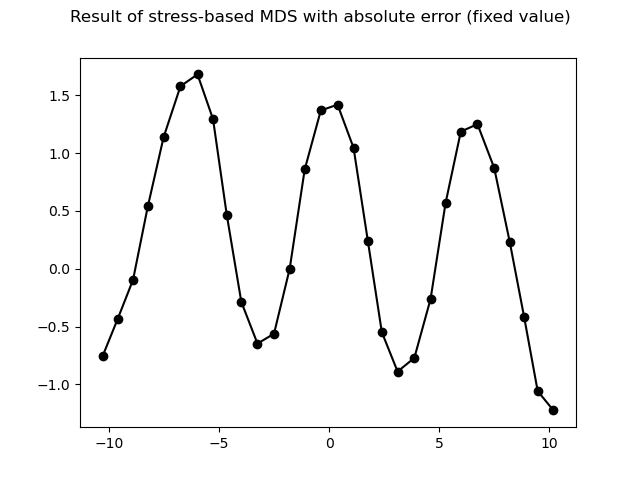

In [27]:
fig = plt.figure()
fig.suptitle('Result of stress-based MDS with absolute error (fixed value)')

ax = fig.add_subplot()
ax.scatter(Y_abs_fixed[0,:], Y_abs_fixed[1,:], c='k')
ax.plot(Y_abs_fixed[0,:], Y_abs_fixed[1,:], c='k')
ax.axis('tight');

#### <span style="color:red">Map 3-D data onto 2-D using relative error</span>

In [28]:
# Run this example with gradient descent optimisation.
# It is quite slow, so you need to control hyper-parameters.
# For the usage, please refer to the example of sammon's mapping which is located below

n_dim = 2

# complete this part with the function, stress_based_mds().
# use optim='gd'
# "Way to find the best parameters" is shown above for the reason that lr=0.01
Y_rel_fixed = stress_based_mds(X_spiral, 
                                n_dim, 
                                loss_rel,
                                grad_rel,
                                init='fixed',
                                lr=0.01,
                                tol=1e-9,
                                optim='gd',
                                max_iter=50000,
                                init_value=init_y_spiral)

iter: 0, stress: 4.46e+01, stress variance : 1.59e-01
iter: 50, stress: 3.31e+00, stress variance : 9.37e-03
iter: 100, stress: 2.51e+00, stress variance : 2.97e-03
iter: 150, stress: 2.26e+00, stress variance : 1.54e-03
iter: 200, stress: 2.12e+00, stress variance : 1.12e-03
iter: 250, stress: 2.02e+00, stress variance : 7.93e-04
iter: 300, stress: 1.96e+00, stress variance : 4.88e-04
iter: 350, stress: 1.92e+00, stress variance : 2.48e-04
iter: 400, stress: 1.90e+00, stress variance : 1.16e-04
iter: 450, stress: 1.90e+00, stress variance : 6.22e-05
iter: 500, stress: 1.89e+00, stress variance : 4.17e-05
iter: 550, stress: 1.89e+00, stress variance : 3.29e-05
iter: 600, stress: 1.88e+00, stress variance : 2.83e-05
iter: 650, stress: 1.88e+00, stress variance : 2.58e-05
iter: 700, stress: 1.88e+00, stress variance : 2.42e-05
iter: 750, stress: 1.88e+00, stress variance : 2.33e-05
iter: 800, stress: 1.88e+00, stress variance : 2.27e-05
iter: 850, stress: 1.87e+00, stress variance : 2.23

iter: 7350, stress: 1.82e+00, stress variance : 5.89e-07
iter: 7400, stress: 1.82e+00, stress variance : 5.44e-07
iter: 7450, stress: 1.82e+00, stress variance : 5.02e-07
iter: 7500, stress: 1.82e+00, stress variance : 4.65e-07
iter: 7550, stress: 1.82e+00, stress variance : 4.32e-07
iter: 7600, stress: 1.82e+00, stress variance : 4.02e-07
iter: 7650, stress: 1.82e+00, stress variance : 3.76e-07
iter: 7700, stress: 1.82e+00, stress variance : 3.53e-07
iter: 7750, stress: 1.82e+00, stress variance : 3.32e-07
iter: 7800, stress: 1.82e+00, stress variance : 3.14e-07
iter: 7850, stress: 1.82e+00, stress variance : 2.98e-07
iter: 7900, stress: 1.82e+00, stress variance : 2.84e-07
iter: 7950, stress: 1.82e+00, stress variance : 2.72e-07
iter: 8000, stress: 1.82e+00, stress variance : 2.61e-07
iter: 8050, stress: 1.82e+00, stress variance : 2.51e-07
iter: 8100, stress: 1.82e+00, stress variance : 2.42e-07
iter: 8150, stress: 1.82e+00, stress variance : 2.34e-07
iter: 8200, stress: 1.82e+00, s

iter: 14600, stress: 1.81e+00, stress variance : 4.42e-08
iter: 14650, stress: 1.81e+00, stress variance : 4.33e-08
iter: 14700, stress: 1.81e+00, stress variance : 4.25e-08
iter: 14750, stress: 1.81e+00, stress variance : 4.17e-08
iter: 14800, stress: 1.81e+00, stress variance : 4.09e-08
iter: 14850, stress: 1.81e+00, stress variance : 4.01e-08
iter: 14900, stress: 1.81e+00, stress variance : 3.93e-08
iter: 14950, stress: 1.81e+00, stress variance : 3.85e-08
iter: 15000, stress: 1.81e+00, stress variance : 3.78e-08
iter: 15050, stress: 1.81e+00, stress variance : 3.70e-08
iter: 15100, stress: 1.81e+00, stress variance : 3.63e-08
iter: 15150, stress: 1.81e+00, stress variance : 3.56e-08
iter: 15200, stress: 1.81e+00, stress variance : 3.49e-08
iter: 15250, stress: 1.81e+00, stress variance : 3.42e-08
iter: 15300, stress: 1.81e+00, stress variance : 3.35e-08
iter: 15350, stress: 1.81e+00, stress variance : 3.28e-08
iter: 15400, stress: 1.81e+00, stress variance : 3.22e-08
iter: 15450, s

iter: 21950, stress: 1.81e+00, stress variance : 3.26e-09
iter: 22000, stress: 1.81e+00, stress variance : 3.21e-09
iter: 22050, stress: 1.81e+00, stress variance : 3.16e-09
iter: 22100, stress: 1.81e+00, stress variance : 3.11e-09
iter: 22150, stress: 1.81e+00, stress variance : 3.06e-09
iter: 22200, stress: 1.81e+00, stress variance : 3.01e-09
iter: 22250, stress: 1.81e+00, stress variance : 2.96e-09
iter: 22300, stress: 1.81e+00, stress variance : 2.91e-09
iter: 22350, stress: 1.81e+00, stress variance : 2.87e-09
iter: 22400, stress: 1.81e+00, stress variance : 2.82e-09
iter: 22450, stress: 1.81e+00, stress variance : 2.78e-09
iter: 22500, stress: 1.81e+00, stress variance : 2.73e-09
iter: 22550, stress: 1.81e+00, stress variance : 2.69e-09
iter: 22600, stress: 1.81e+00, stress variance : 2.64e-09
iter: 22650, stress: 1.81e+00, stress variance : 2.60e-09
iter: 22700, stress: 1.81e+00, stress variance : 2.56e-09
iter: 22750, stress: 1.81e+00, stress variance : 2.52e-09
iter: 22800, s

<IPython.core.display.Javascript object>


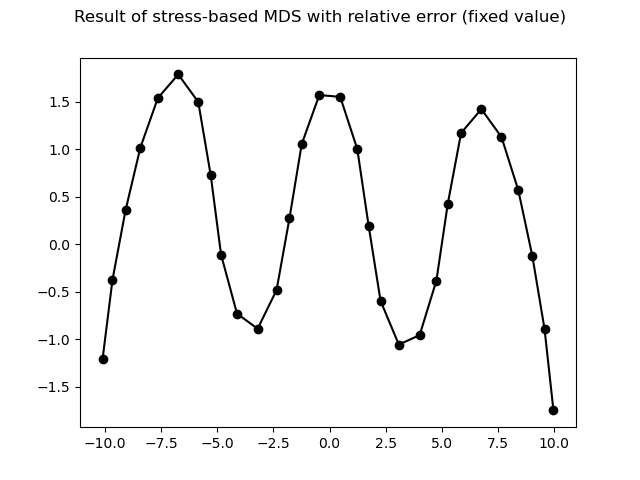

In [29]:
fig = plt.figure()
fig.suptitle('Result of stress-based MDS with relative error (fixed value)')

ax = fig.add_subplot()
ax.scatter(Y_rel_fixed[0,:], Y_rel_fixed[1,:], c='k')
ax.plot(Y_rel_fixed[0,:], Y_rel_fixed[1,:], c='k')
ax.axis('tight');

### <span style="color:red">Example with real data (Airline Distance)</span>

In [30]:
flying_dist, city = airline_dist()
flying_dist = flying_dist + flying_dist.T

init_y_airline_2d = np.load('Data/init_val_airline_2d.npz')['init']
init_y_airline_3d = np.load('Data/init_val_airline_3d.npz')['init']

In [31]:
# Run this exaple with fixed init values.
# use optim='cg', init='fixed' here
# use loss_sammon, grad_sammon here for loss function 
# and its derivative

# Run it in 2-D space
n_dim = 2
Y_2d = stress_based_mds(flying_dist, 
                            n_dim, 
                            loss_sammon,
                            grad_sammon,
                            init='fixed',
                            optim='cg',
                            max_iter=50000,
                            init_value=init_y_airline_2d)

# Run it in 3-D space
n_dim = 3
Y_3d = stress_based_mds(flying_dist,  
                            n_dim, 
                            loss_sammon,
                            grad_sammon,
                            init='fixed',
                            optim='cg',
                            max_iter=50000,
                            init_value=init_y_airline_3d)

Optimization terminated successfully.
         Current function value: 0.272411
         Iterations: 1
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.317910
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


<IPython.core.display.Javascript object>


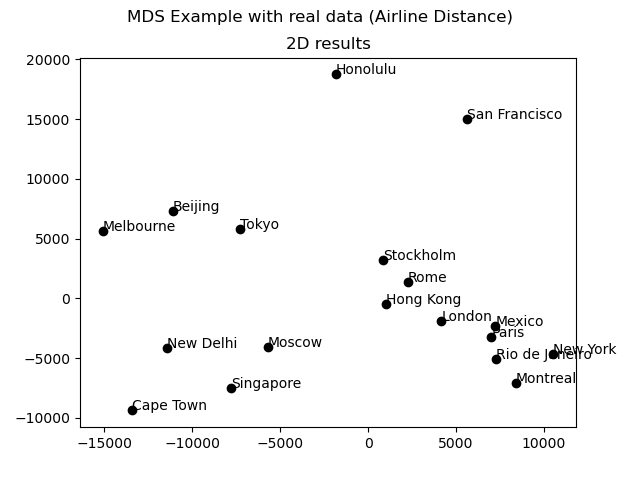

In [32]:
fig = plt.figure()
fig.suptitle('MDS Example with real data (Airline Distance)')

# 2d result
ax_2d = fig.add_subplot()
ax_2d.set_title('2D results')
ax_2d.scatter(Y_2d[0,:], Y_2d[1,:], c='k')
for i in range(len(city)):
    ax_2d.text(Y_2d[0,i], Y_2d[1,i], city[i])
ax_2d.axis('tight');

<IPython.core.display.Javascript object>


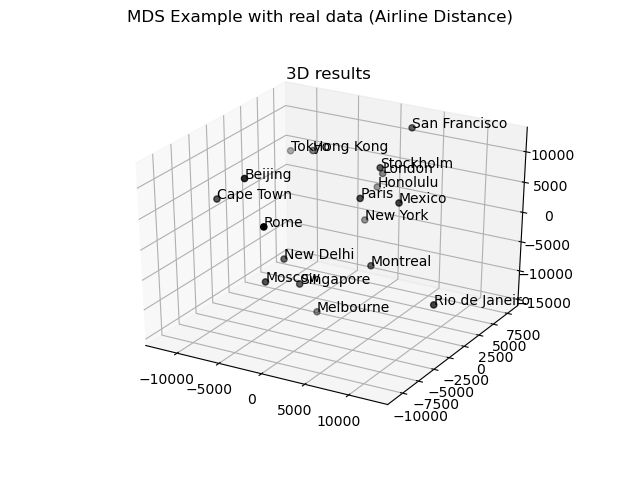

In [33]:
fig = plt.figure()
fig.suptitle('MDS Example with real data (Airline Distance)')

# 3d result
ax_3d = fig.add_subplot(projection='3d')
ax_3d.set_title('3D results')
ax_3d.scatter(Y_3d[0,:], Y_3d[1,:], Y_3d[2,:], c='k')
for i in range(len(city)):
    ax_3d.text(Y_3d[0,i], Y_3d[1,i], Y_3d[2,i], city[i])
ax_3d.axis('tight');

### <span style="color:red">=========== End of Assignment 3 ===========</span>

## ==== Isometric Feature Mapping (ISOMAP) ====

In [34]:
from Code.helpers import VIS, VIS_Shortest_path_2d, ImageViewer

### <span style="color:red">============= Assignment 4 =============</span>
<span style="color:red">
    Implement the function <b>fixed_radius_distance</b> for $\epsilon$-isomap and run the code with swiss roll dataset.</span>

#### <span style="color:red">This is the first part of assignment 4</span>
<span style="color:red">Complete the function (fixed_radius_distance)</span>

In [35]:
# This is the first part of assignment 4 ===============================
def fixed_radius_distance(X, epsilon):
    """
    Calculate distances of neighbors for epsilon-isomap
    
    Parameters
    ----------
    X: (d,n) array, where n is the number of points and d is its dimension
    epsilon: criterion of selecting neighbors
        Select points as its neighbours if distance < epsilon
        
    Returns
    -------
    neighbors: (n,n) array
        It is filled with distances with neighbors. 
        The remaining unreachable distances are set to zero.
        Each row corresponds to a specific point (row-major order)
    """
    
    # Compute distance map
    X_t = X.T
    distances = euclidean_distances(X_t, X_t)

    # Keep only distance < epsilon, otherwise set to 0 (= unreachable)
    neighbors = np.zeros_like(distances)
    
    # The first part of Assignment 4 =============================
    # Complete here.....
    neighbors = np.vectorize(lambda x: x if x < epsilon else 0)(distances) 
    return neighbors

# =======================================================================

### cmds(X, n_dim, input_type)
This is the fuction of classical multidimensional scaling (cmds) which is python extension implemented in c++. Depending on operatign system (os) you use, you need to place dynamic library file (.pyd (windows) or .so (linux)) in the same directory with this notebook file. You can use this function like <br/>
<b>from Code.mds import cmds</b>.

The name of the file is like either mds.cp3x-win_amd64.pyd or mds.cpython-3x-x86_64-linux-gnu.so 
according to the operatin system you use.
Of which, 3x stands for the version of python you use. <br/>
e.g mds.cp37-win_amd64.pyd for Python 3.7

In [36]:
from Code.mds import cmds

from Code.isomap import isomap, nearest_neighbor_distance

### Example with Swiss Roll

In [37]:
from sklearn.datasets import make_swiss_roll

n_points = 1000
data_s_roll, color = make_swiss_roll(n_points)
data_s_roll = data_s_roll.T

<IPython.core.display.Javascript object>


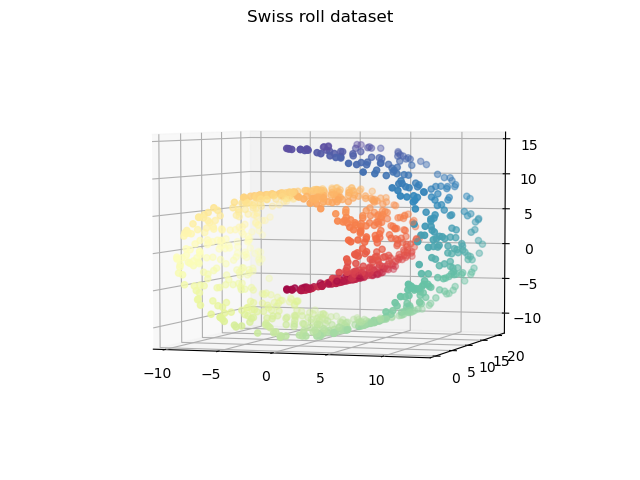

In [38]:
fig_swiss_roll = plt.figure()
fig_swiss_roll.suptitle("Swiss roll dataset")

# Add 3d scatter plot
ax = fig_swiss_roll.add_subplot(projection='3d')
ax.scatter(data_s_roll[0,:], data_s_roll[1,:], data_s_roll[2,:], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72);

In [39]:
n_components = 2
n_neighbors = 6
Y_nn, dist_nn, predecessors_nn = isomap(data_s_roll, 
                                        n_components, 
                                        dist_type='nearest', 
                                        n_neighbors=n_neighbors, 
                                        dist_func=nearest_neighbor_distance, 
                                        cmds_func=cmds)

<IPython.core.display.Javascript object>


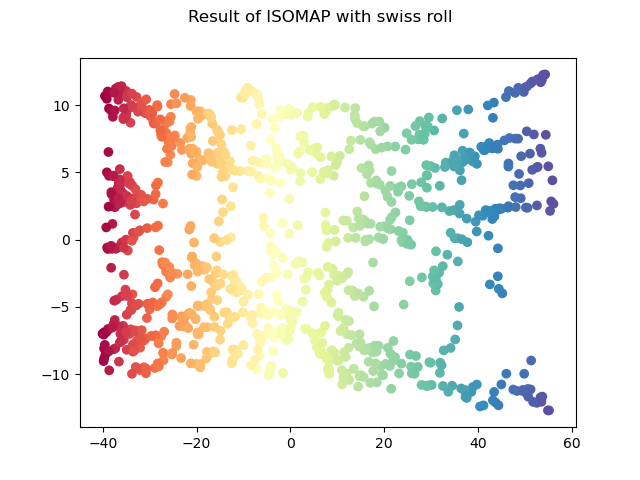

In [40]:
fig_nn_result = plt.figure()
fig_nn_result.suptitle("Result of ISOMAP with swiss roll")

ax = fig_nn_result.add_subplot()
ax.scatter(Y_nn[0,:], Y_nn[1,:], c=color, cmap=plt.cm.Spectral)
ax.axis('tight');

#### <span style="color:red">This is the second part of assignment 4</span>
<span style="color:red">Run the code with Swiss roll dataset to demonstrate the **fixed_radius_distance** function($\epsilon$-isomap)</span>

In [41]:
epsilon = 3.5
Y_radius, dist_radius, predecessors_radius = isomap(data_s_roll, n_components, 
                                                    dist_type='radius', 
                                                    epsilon=epsilon, 
                                                    dist_func=fixed_radius_distance, 
                                                    cmds_func=cmds)

<IPython.core.display.Javascript object>


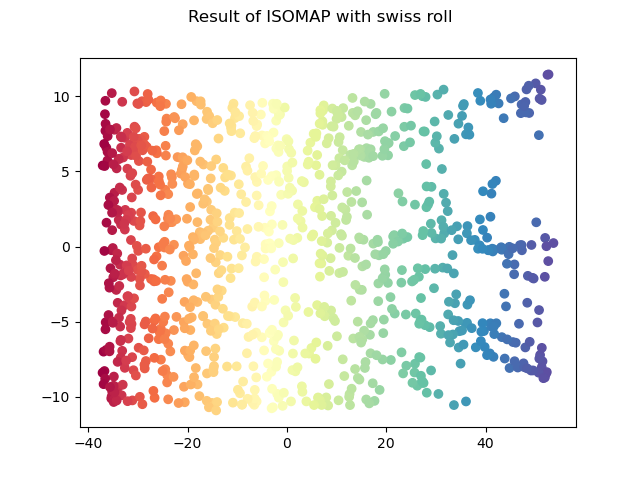

In [42]:
fig_radius_result = plt.figure()
fig_radius_result.suptitle("Result of ISOMAP with swiss roll")

ax = fig_radius_result.add_subplot()
ax.scatter(Y_radius[0,:], Y_radius[1,:], c=color, cmap=plt.cm.Spectral)
ax.axis('tight');

### <span style="color:red">=========== End of Assignment 4 ===========</span>
<span style="color:red">

### Example with face data

In [43]:
from Code.dataset import face_tenenbaum

data_face = face_tenenbaum()
print(data_face.shape)
image_size = [64,64]

(4096, 698)


In [44]:
n_components = 2
n_neighbors = 6
Y_face, dist_face, predecessors_face = isomap(data_face, n_components, 
                                              dist_type='nearest', 
                                              n_neighbors=n_neighbors, 
                                              dist_func=nearest_neighbor_distance, 
                                              cmds_func=cmds)

<IPython.core.display.Javascript object>


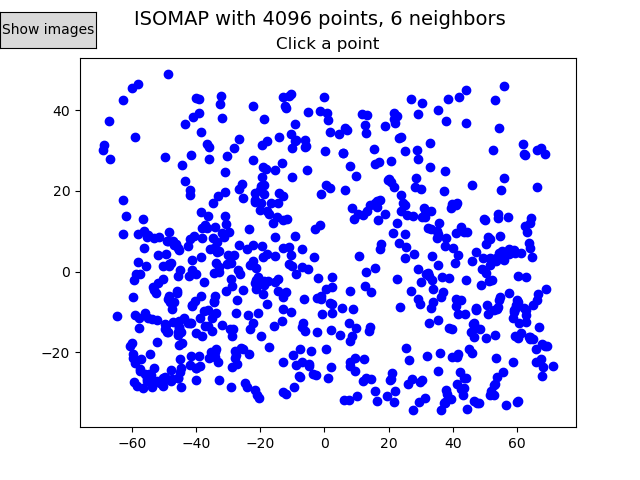

In [45]:
fig_face = plt.figure()
fig_face.suptitle("ISOMAP with %i points, %i neighbors"
            % (data_face.shape[0], n_neighbors), fontsize=14)
vis_face = VIS(data_face, Y_face, fig_face, img_size=image_size)

### <span style="color:red">============= Assignment 5 =============</span>
<span style="color:red">Pick <b>two points</b> both vertically and horizontally and show images on each path. Describe what you observe on those points in two paths in terms of manifold learning. You can use <b>VIS_Shortest_path_2d</b> for selecting two points , which is provided for the convenience. Also, for displaying images, <b>ImageViewer</b> class can be used.</span> <br/>

#### Shortest path of specific two points

In [46]:
def get_shortest_path(predecessors, start_idx, end_idx):
    path = [end_idx]
    k = end_idx
    while predecessors[start_idx, k] != -9999:
        path.append(predecessors[start_idx, k])
        k = predecessors[start_idx, k]
    return path[::-1]

#### Horizontal Path

<IPython.core.display.Javascript object>


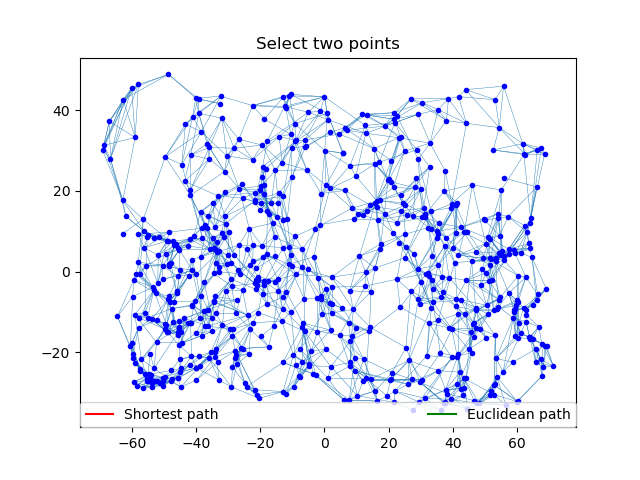

In [47]:
fig_face_index_h = plt.figure()
vis_face_index_h = VIS_Shortest_path_2d(Y_face, dist_face, predecessors_face, fig_face_index_h)

In [48]:
# You should input the indices of two points you chose
# using the above figure.
start_idx =  538# put first index
end_idx =  100# put second index
path_face_h = get_shortest_path(predecessors_face, start_idx, end_idx)
print(path_face_h)

[538, 35, 461, 212, 647, 149, 2, 84, 687, 682, 444, 194, 625, 400, 674, 103, 170, 100]


<span style="color:red">
    You will get the connectivity of embedded points from the result of the above cell. Select two points. You can identify what you choose at the title of the figure and input the indices as start_index and end_index in the below cell.
</span> <br/><br/>
<span style="color:red">
    For example, if you chose <b>538, 100</b> as start_idx and end_idx, respectively, you will get the indices of the shortest path like <br/>
    <b>[538, 35, 461, 212, 647, 149, 2, 84, 687, 682, 444, 194, 625, 400, 674, 103, 170, 100]</b>
</span><br/><br/>
<span style="color:red">
    The result will <b>vary</b> depending on points you choose. This part is about horizontal path, so please choose a horizontal path.
</span>

<IPython.core.display.Javascript object>


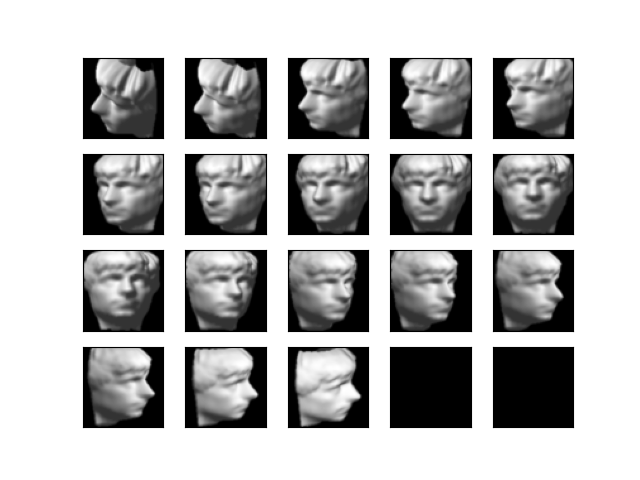

In [49]:
fig_face_h = plt.figure()
img_viewer_h = ImageViewer(data_face, path_face_h, image_size, fig_face_h, 5)
img_viewer_h.show()

#### Vertical Path

<IPython.core.display.Javascript object>


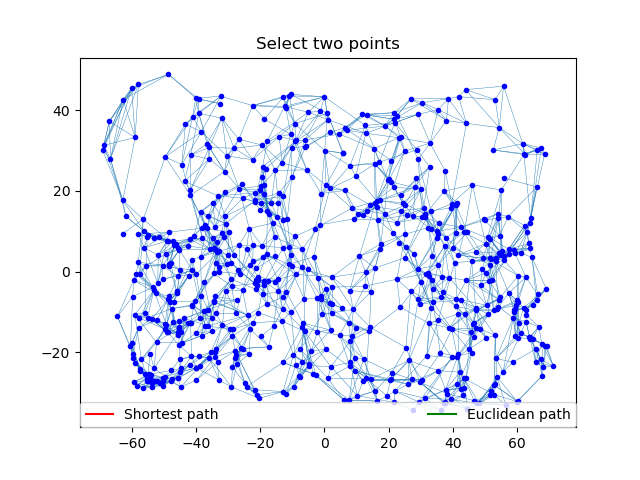

In [50]:
fig_face_index_v = plt.figure()
vis_face_index_v = VIS_Shortest_path_2d(Y_face, dist_face, predecessors_face, fig_face_index_v)

#### <span style="color:red">Please choose a vertical path by selecting two points from the above figrue.</span>
<span style="color:red">You will get the indices of the shortest path from the below cell like <br/>
    <b>[652, 340, 683, 114, 416, 270, 507, 681, 537, 27]</b><br/>
    (in case of start_idx: 662, end_idx: 27)
</span><br/><br/>
<span style="color:red">The result will vary based on the points you choose, but this is about <b>vertical path</b>, so please choose a vertical path.</span>

In [51]:
start_idx =  652# put first index
end_idx =  27# put second index
path_face_v = get_shortest_path(predecessors_face, start_idx, end_idx)
print(path_face_v)

[652, 340, 683, 114, 416, 270, 507, 681, 537, 27]


<IPython.core.display.Javascript object>


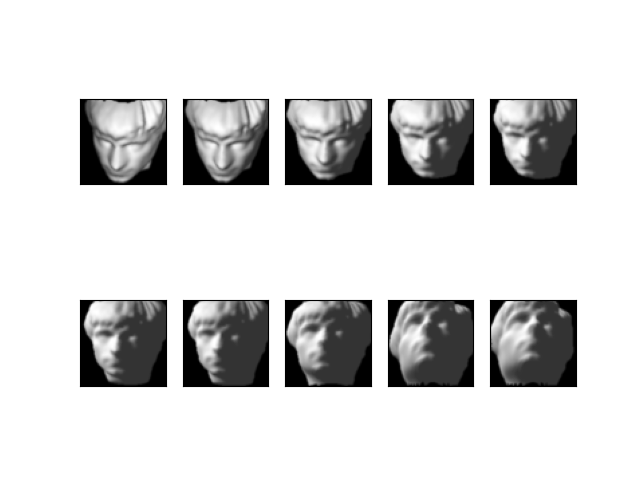

In [52]:
fig_face_v = plt.figure()
img_viewer_v = ImageViewer(data_face, path_face_v, image_size, fig_face_v, 5)
img_viewer_v.show()

## <span style="color:red">Expalin what you observe</span>
<span style="color:red">Please explain what happened on each path. You may talk about the direction of the head.</span>

It shows different poses of the face.

On the horizon path, the face moves horizontally, as if a person's face turns from the right to the left, or it can also be said that like a camera horizontally from a person's right face to a person's left face.

On the vertical path, the face moves vertically, as if a person first bows their heads and then looks up, or it can also be said that, like a camera that shoots from the top of the head to the chin.

### explain:
The reason this happens is: We know that a point(e.g. 538 here) represents a face, the horizontal axis is the left-right pose, and the vertical axis is the up-down pose. Isomap uses the shortest distance to construct the distance matrix of the original space. 

On the horizon path, the shortest path is also horizontal(or nearly horizontal), and the faces on this path are all in the same(or nearly same) horizontal direction, so the face is a right-left pose.

![h](https://i.ibb.co/VC4sM4P/20210111155100.png)

We can see that the shortest path from point 538 to point 100 in the above figure is not absolutely horizontal, so the image of the face we see will also slightly change in the up-down direction.

On the vertical path, the shortest path is also vertical(or nearly vertical), and the faces on this path are all in the same(or nearly same) vertical direction, so the face is a up-down pose.

![h](https://i.ibb.co/HxV5h1x/20210111155105.png)

We can see that the shortest path from point 652 to point 27 in the above figure is not absolutely horizontal, so the image of the face we see will also slightly change in the right-left direction.

### <span style="color:red">=========== End of Assignment 5 ===========</span>

## ======= Locally Linear Embedding (LLE) =======

In [53]:
from scipy.stats import pearsonr, spearmanr
from Code.helpers import VIS_Bars

### Steps of LLE
1. Select neighbors
2. Reconstruct with linear weights
3. Map to embedded coordinates

In [54]:
from Code.lle import lle

### <span style="color:red">============ Assignment 6 =========== </span>
<span style="color:red">
1. Run LLE with synthetic datasets (<b>S-Curve</b>) <br/>
2. Find <b>the best hyper-parameter</b> to embed the data into 2-D space(the number of neighbours (K) for K-isomap, epsilon ($\epsilon$) for $\epsilon$-isomap). <br/>
3. Describe how to find them. <br/>
4. Plot the values you calculate for selecting the best parameters (e.g. correlation coefficient)
    
You may use <b>correlation coefficient</b> between original manifold coordinates and embedded coordinates. To this end, a build-in function is provided from the scipy package to calculate the correlation coefficient of two vectors (<b>scipy.stats.pearsonr</b>)</span> <br/><br/>

<span style="color:red">
    For the best number of neighbourhood (<b>K</b>), inspect the range <b>from 5 to 50</b> with an interval of 1. For the fixed radius (<b>$\epsilon$</b>), search the range <b>from 0.1 to 0.8</b> with an interval of 0.1.
</span>

### Example (S-curve)

In [55]:
from sklearn.datasets import make_s_curve
n_points = 1000
X, angle = make_s_curve(n_points, random_state=0)
X = X.T

<IPython.core.display.Javascript object>


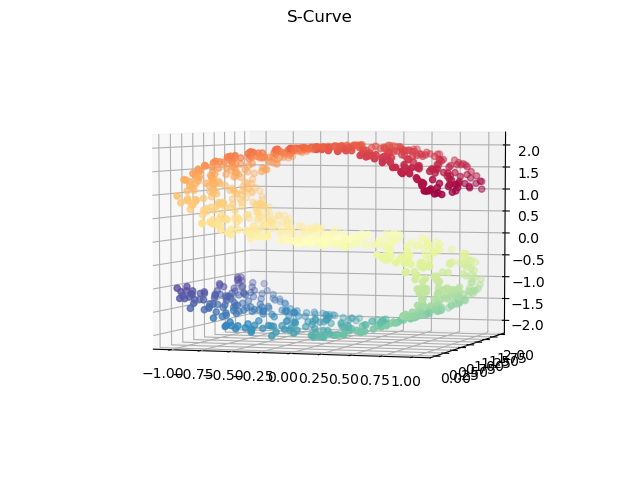

In [56]:
fig_s_curve = plt.figure()
fig_s_curve.suptitle('S-Curve')
    
colorize = dict(c=angle, cmap=plt.cm.Spectral)
# Add 3d scatter plot
ax = fig_s_curve.add_subplot(projection='3d')
ax.scatter(X[0,:], X[1,:], X[2,:], **colorize)
ax.view_init(4, -72)

### <span style="color:red"> Describe how to find the best parameter </span>
<span style="color:red">The aim of manifold learning is embedding data from high dimension to low dimension. To measure the quality of LLE, we can utilise correlation coefficient. The target space is 2-D, so two correlation coefficients should be calculated (one between angle and 1st embedded coordinate (main axis), one between height and 2nd embedded coordinates). Choose the best hyper-parameter which has high correlation in both cases. </span> <br/><br/>

<span style="color:red">
    The best number of neighbour (K): <b>??</b> <br/>
The best fixed radius ($\epsilon$): <b>??</b> <br/>
</span>

In [57]:
# Find the best number of neighbourhood (K) here
# Plot the value (correlation) you calculate 
# for selecting the best number of neighbourhood
n_components = 2

# cors stands for correlation cofficients
cors = []
cors_mean = []

for i in range(5, 51):
    y_test = lle(X, n_neighbors=i, n_components=n_components)
    
    # get the correlation cofficient.
    
    cor_angle, p_angle = pearsonr(angle, y_test[0])
    cor_height, p_height = pearsonr(X[1],y_test[1])
    # put k(the number of neighbors), correlation coefficient for agnle and correlation coefficient for height into the list.
    cors.append([i, cor_angle, cor_height])
    # We use abs here because the greater the Pearson coefficient, the greater the absolute value
    cors_mean.append([i, np.mean([abs(cor_angle), abs(cor_height)])])

# use to draw the plot
cors = np.array(cors)
cors_mean = np.array(cors_mean)

###  Plot the correlation coefficient

<ipython-input-58-9072681f9336>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


<IPython.core.display.Javascript object>


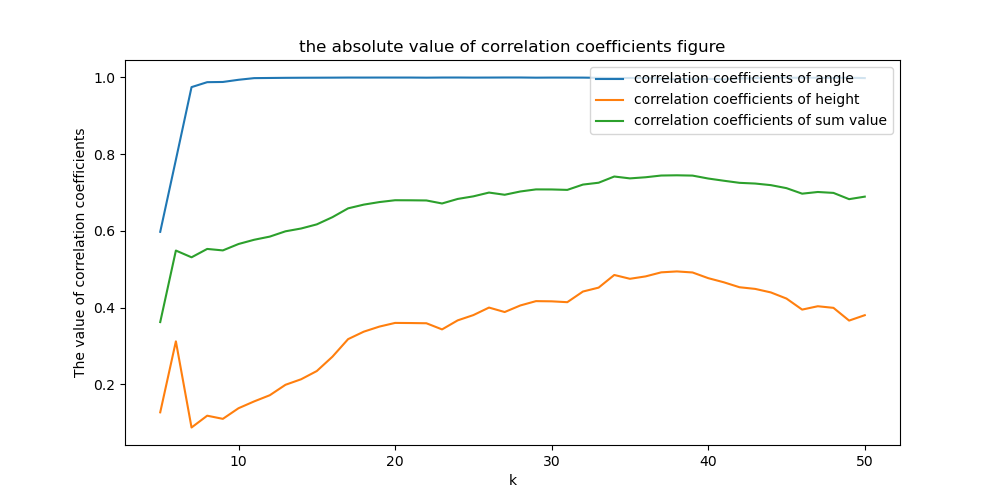

In [58]:
plt.figure(figsize=(10,5))
plt.title('the absolute value of correlation coefficients figure')
plt.xlabel('k')
plt.ylabel('The value of correlation coefficients')

plt.plot(range(5, 51), abs(cors[:, 1]), label = 'correlation coefficients of angle')
plt.plot(range(5, 51), abs(cors[:, 2]), label = 'correlation coefficients of height')
plt.plot(range(5, 51), cors_mean[:, 1], label = 'correlation coefficients of sum value')

plt.legend(loc=1)
plt.show()

### FInd best k

In [59]:
# Sort the correlation cofficients
# The element of the internal one-dimensional list with subscript 1 is the primary, and the element with subscript 2 is the secondary
# sort the list from high to low
# Because the negative Pearson coefficient represents negative correlation, we use absolute value sorting when sorting
sorted_cors = sorted(cors, key=(lambda x: [abs(x[1]), abs(x[2])]), reverse=True)
print(sorted_cors) 

[array([27.        ,  0.99992879, -0.38882331]), array([28.        , -0.99992714,  0.4059361 ]), array([24.        , -0.99986694,  0.36712055]), array([23.        ,  0.99982557, -0.34355955]), array([19.        , -0.999794  , -0.35089767]), array([21.        , -0.99977588, -0.36014258]), array([20.        , -0.9997749 , -0.36045736]), array([17.        , -0.99976678, -0.31821155]), array([26.        , -0.99975736, -0.40044159]), array([18.        , -0.99972382, -0.33765425]), array([30.        , -0.9997182 , -0.41669953]), array([31.        , -0.99971026, -0.41448458]), array([25.        , -0.9996579 ,  0.38084277]), array([32.        ,  0.9996191 , -0.44222856]), array([16.        , -0.99954388, -0.27248162]), array([29.        ,  0.99949803,  0.41722044]), array([22.        ,  0.99949654, -0.35958617]), array([15.        ,  0.99940889,  0.23506376]), array([49.        ,  0.99932332, -0.36653718]), array([45.        , -0.99931436, -0.42389516]), array([46.        , -0.99930622, -0.395

In [60]:
# Sort the correlation cofficients
# The element of the internal one-dimensional list with subscript 1 is the primary, and the element with subscript 2 is the secondary
# sort the list from high to low
# Because the negative Pearson coefficient represents negative correlation, we use absolute value sorting when sorting
sorted_cors2 = sorted(cors, key=(lambda x: [abs(x[2]), abs(x[1])]), reverse=True)
print(sorted_cors2) 

[array([38.        ,  0.99558274, -0.49463351]), array([37.        , -0.99677764,  0.49224121]), array([39.        ,  0.99674808,  0.49190378]), array([34.        , -0.99847036, -0.4853915 ]), array([36.        , -0.99834417, -0.48166385]), array([40.        ,  0.99629457, -0.47710346]), array([35.        ,  0.99870398, -0.47541787]), array([41.        ,  0.99551535, -0.46631128]), array([42.        ,  0.99751248, -0.45340875]), array([33.        ,  0.99906428, -0.45242144]), array([43.        ,  0.99816527, -0.4491003 ]), array([32.        ,  0.9996191 , -0.44222856]), array([44.        , -0.99899321, -0.43993038]), array([45.        , -0.99931436, -0.42389516]), array([29.        ,  0.99949803,  0.41722044]), array([30.        , -0.9997182 , -0.41669953]), array([31.        , -0.99971026, -0.41448458]), array([28.        , -0.99992714,  0.4059361 ]), array([47.        ,  0.99927941, -0.40391845]), array([26.        , -0.99975736, -0.40044159]), array([48.        , -0.99875561, -0.399

In [61]:
sorted_mean = sorted(cors_mean, key=(lambda x: x[1]), reverse=True)
print(sorted_mean)

[array([38.        ,  0.74510812]), array([37.        ,  0.74450942]), array([39.        ,  0.74432593]), array([34.        ,  0.74193093]), array([36.        ,  0.74000401]), array([35.        ,  0.73706093]), array([40.        ,  0.73669901]), array([41.        ,  0.73091332]), array([33.        ,  0.72574286]), array([42.        ,  0.72546062]), array([43.        ,  0.72363279]), array([32.        ,  0.72092383]), array([44.       ,  0.7194618]), array([45.        ,  0.71160476]), array([29.        ,  0.70835924]), array([30.        ,  0.70820887]), array([31.        ,  0.70709742]), array([28.        ,  0.70293162]), array([47.        ,  0.70159893]), array([26.        ,  0.70009948]), array([48.        ,  0.69923632]), array([46.        ,  0.69723154]), array([27.        ,  0.69437605]), array([25.        ,  0.69025034]), array([50.        ,  0.68949759]), array([24.        ,  0.68349374]), array([49.        ,  0.68293025]), array([20.        ,  0.68011613]), array([21.        ,  

### Describe

It can be seen that the best k is 38.

First, we sort by cor_angle in descending order, then by cor_height in descending order, and then by the average in descending(absolute value) order.

Descending order is used because of the greater the Pearson coefficient's absolute value, the more relevant the variables.

The reason for this is to exclude the influence of extreme situations. Suppose that cor_angle = 0.9 and cor_height = 0 when k = m, and cor_angle = 0.4 and cor_height = 0.4 when k = n. I think the effect of k=n It will be better, so I will consider the optimal solution comprehensively by observing the rank of k and the values of cor_angle and cor_height in each sort.

In the scenario of this question, the best value obtained with the average value is 38. I will observe that when k = 38, the results sorted by cor_angle, which is relatively low, but when k = 27 (cor_angle = 0.99992879) in the first place The absolute value of cor_angle(cor_angle = 0.99558274) is similar, so it is more reasonable to take k = 38.

In [62]:
n_neighbors =  38# put the best number here
n_components = 2
Y_K = lle(X , n_components=n_components, n_neighbors=n_neighbors)

<ipython-input-63-099764236921>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_s_curve_result = plt.figure()


<IPython.core.display.Javascript object>


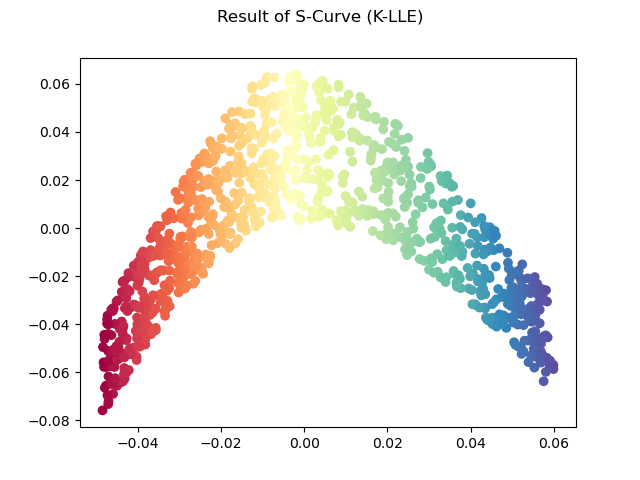

In [63]:
fig_s_curve_result = plt.figure()
fig_s_curve_result.suptitle('Result of S-Curve (K-LLE)')
ax = fig_s_curve_result.add_subplot()
ax.scatter(Y_K[0,:],Y_K[1,:],**colorize);

In [64]:
# Find the best radius (epsilon) here
# Plot the value (correlation) you calculate 
# for selecting the best radius (epsilon)
n_components = 2

# cors stands for correlation cofficients
cors = []
cors_mean = []


for i in np.arange(0.1, 0.9, 0.1):
    # Avoid precision loss, use round function
    i = round(i, 1)
    y_test = lle(X, n_components=n_components, epsilon=i)
    
    # get the correlation cofficient.
    cor_angle, p_angle = pearsonr(angle,y_test[0])
    cor_height, p_height = pearsonr(X[1],y_test[1])
    # put 𝜖 (fixed radius), correlation coefficient for agnle and correlation coefficient for height into the list.
    cors.append([i, cor_angle, cor_height])
    cors_mean.append([i, np.mean([abs(cor_angle), abs(cor_height)])])

# use to draw the plot
cors = np.array(cors)
cors_mean = np.array(cors_mean)

<ipython-input-65-f6d7117bddd1>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


<IPython.core.display.Javascript object>


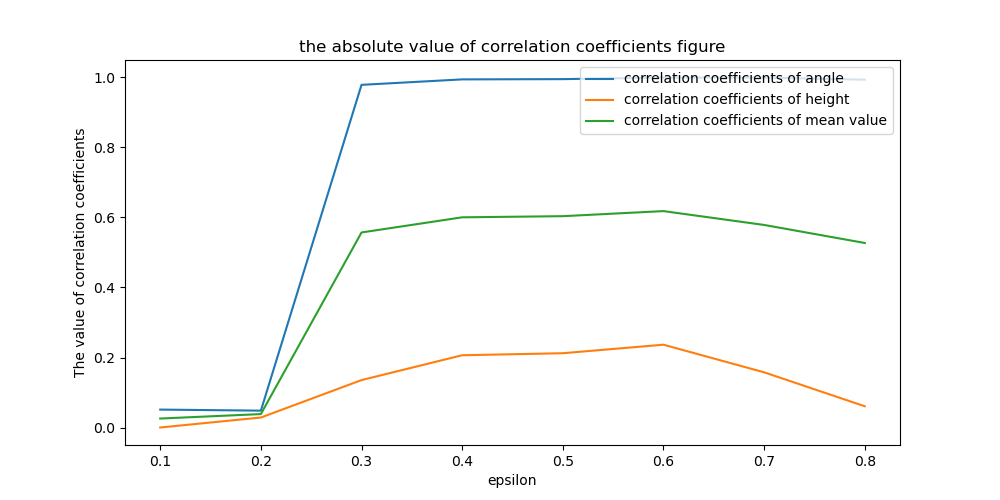

In [65]:
plt.figure(figsize=(10,5))
plt.title('the absolute value of correlation coefficients figure')
plt.xlabel('epsilon')
plt.ylabel('The value of correlation coefficients')

plt.plot(np.arange(0.1, 0.9, 0.1), abs(cors[:, 1]), label = 'correlation coefficients of angle')
plt.plot(np.arange(0.1, 0.9, 0.1), abs(cors[:, 2]), label = 'correlation coefficients of height')
plt.plot(np.arange(0.1, 0.9, 0.1), abs(cors_mean[:, 1]), label = 'correlation coefficients of mean value')

plt.legend(loc=1)
plt.show()

In [66]:
# Sort the correlation cofficients
# The element of the internal one-dimensional list with subscript 1 is the primary, and the element with subscript 2 is the secondary
# sort the list from high to low
# Because the negative Pearson coefficient represents negative correlation, we use absolute value sorting when sorting
sorted_cors = sorted(cors, key=(lambda x: [abs(x[1]), abs(x[2])]), reverse=True)
print(sorted_cors) 

[array([ 0.6       , -0.99939337, -0.23665085]), array([ 0.7       ,  0.99916548, -0.15783585]), array([ 0.5       , -0.99473115,  0.21233464]), array([ 0.4       ,  0.99400258, -0.20653865]), array([ 0.8       , -0.99313097,  0.0609274 ]), array([ 0.3       , -0.97845278,  0.13564872]), array([ 0.1       , -0.05141575, -0.00030151]), array([ 0.2       ,  0.04842832, -0.02877276])]


In [67]:
# The element of the internal one-dimensional list with subscript 2 is the primary, and the element with subscript 1 is the secondary
# sort the list from high to low
sorted_cors_2 = sorted(cors, key=(lambda x: [abs(x[2]), abs(x[1])]), reverse=True) 
print(sorted_cors_2)

[array([ 0.6       , -0.99939337, -0.23665085]), array([ 0.5       , -0.99473115,  0.21233464]), array([ 0.4       ,  0.99400258, -0.20653865]), array([ 0.7       ,  0.99916548, -0.15783585]), array([ 0.3       , -0.97845278,  0.13564872]), array([ 0.8       , -0.99313097,  0.0609274 ]), array([ 0.2       ,  0.04842832, -0.02877276]), array([ 0.1       , -0.05141575, -0.00030151])]


In [68]:
sorted_mean = sorted(cors_mean, key=(lambda x: x[1]), reverse=True)
print(sorted_mean)

[array([0.6       , 0.61802211]), array([0.5      , 0.6035329]), array([0.4       , 0.60027061]), array([0.7       , 0.57850066]), array([0.3       , 0.55705075]), array([0.8       , 0.52702918]), array([0.2       , 0.03860054]), array([0.1       , 0.02585863])]


### Describe

It can be seen that the best 𝜖 is 0.6.

First, we sort by cor_angle in descending order, then by cor_height in descending order, and then by the average in descending(absolute value) order.

Descending order is used because of the greater the Pearson coefficient's absolute value, the more relevant the variables.

In the scenario of this question, the results of the three sorts are the same, both are 0.6. Therefore, the best 𝜖 is 0.6.

In [69]:
epsilon =  0.6# put the best radius here
n_components = 2
Y_e = lle(X , n_components=n_components, epsilon=epsilon)

<ipython-input-70-aba2030d30aa>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_s_curve_result_epsilon = plt.figure()


<IPython.core.display.Javascript object>


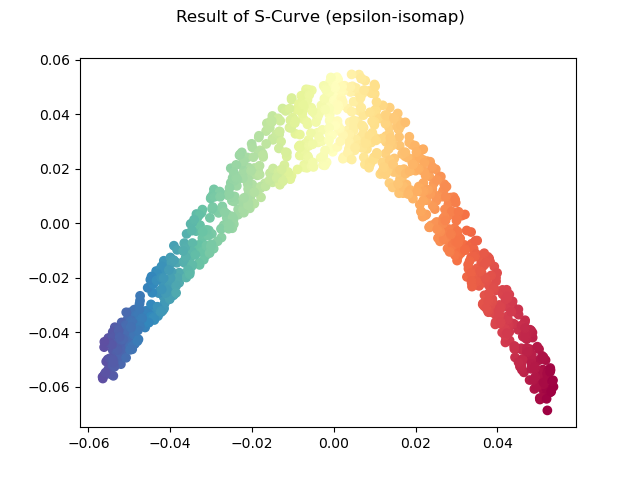

In [70]:
fig_s_curve_result_epsilon = plt.figure()
fig_s_curve_result_epsilon.suptitle('Result of S-Curve (epsilon-isomap)')
ax = fig_s_curve_result_epsilon.add_subplot()
ax.scatter(Y_e[0,:],Y_e[1,:],**colorize);

### <span style="color:red">============ End of Assignment 6 =========== </span>

### Example (Bar images)

In [71]:
from Code.dataset import bars

data_bar, centers = bars()
data_bar = data_bar.T
centers = centers.T
image_size = [40,40]

In [72]:
def reg_func(C, K):
    trace = np.trace(C)
    return 1e-3*trace*K*np.eye(K)

### <span style="color:red">============ Assignment 7 =========== </span>
<span style="color:red">
1. Run LLE with the bar dataset (bars.npz). <br/>
2. Find <b>the best K in K-ISOMAP</b> to embed the data into 2-D space. <br/>
3. Show LLE preserves the topological location of data. You can show this by displaying vertical bars and horizontal bars separately.<br/>
   
You may use <b>correlation coefficient</b> between the center coorinates of bars and embedded coordinates. You can get the center coordinates from the variable, <b>centers</b>, which are obtained from <b>bars()</b> with the data. To this end, a build-in function is provided from the scipy package to calculate the correlation coefficient of two vectors.(<b>scipy.stats.pearsonr</b>)

For K-ISOMAP, search the space ranging <b>from 40 to 60</b> with an interval of 1 and choose the best K.
</span> <br/><br/>

<span style="color:red">
    In terms of bar images, they are placed in the variable, <b>data_bar</b> and its center coordinates are in the variable, <b>centers</b>.<br/>
    The vertical bars are the index from 0 to 499 and the horizontal bars from 500 to 999. In total, there are 1000 bar images.
</span>

In [73]:
# Find the best number of neighourhood (K) here
# You should findthe best number of neighbors in the range from 40 to 60.
n_components = 2

# cors stands for correlation cofficients
cors = []
cors_mean = []

for i in range(40, 61):
    y_test = lle(data_bar, n_components=n_components, n_neighbors=i, reg_func=reg_func)
    # get the correlation cofficient.
    cor1, p1 = pearsonr(centers[0],y_test[0])
    cor2, p2 = pearsonr(centers[1],y_test[1])
    # put k(the number of neighbors), correlation coefficient 1 and correlation coefficient 2 into the list.
    cors.append([i, cor1, cor2])
    cors_mean.append([i, np.mean([abs(cor1), abs(cor2)])])

# use to draw the plot
cors = np.array(cors)
cors_mean = np.array(cors_mean)

<ipython-input-74-9904de936555>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


<IPython.core.display.Javascript object>


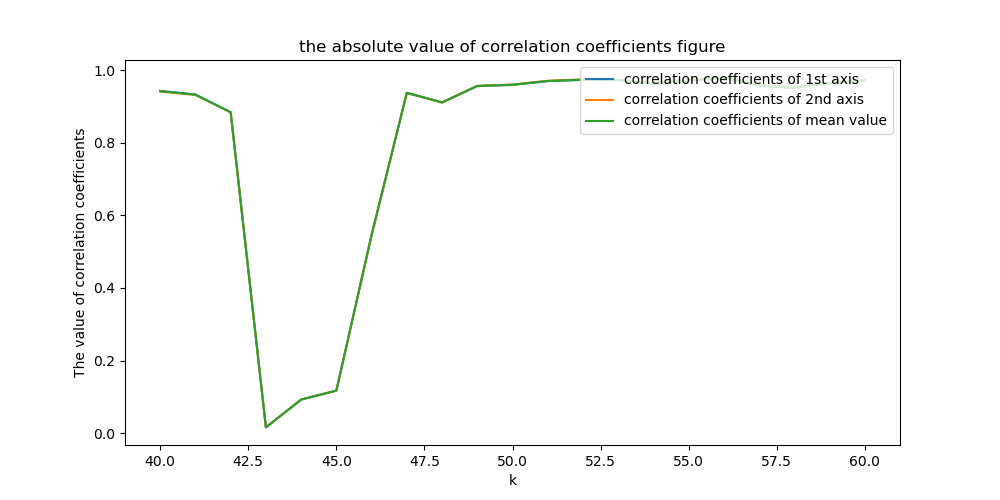

In [74]:
plt.figure(figsize=(10,5))
plt.title('the absolute value of correlation coefficients figure')
plt.xlabel('k')
plt.ylabel('The value of correlation coefficients')

plt.plot(np.arange(40, 61), abs(cors[:, 1]), label = 'correlation coefficients of 1st axis')
plt.plot(np.arange(40, 61), abs(cors[:, 2]), label = 'correlation coefficients of 2nd axis')
plt.plot(np.arange(40, 61), abs(cors_mean[:, 1]), label = 'correlation coefficients of mean value')

plt.legend(loc=1)
plt.show()

In [75]:
# Sort the correlation cofficients
# The element of the internal one-dimensional list with subscript 1 is the primary, and the element with subscript 2 is the secondary
# sort the list from high to low
sorted_cors = sorted(cors, key=(lambda x: [abs(x[1]), abs(x[2])]), reverse=True)
print(sorted_cors) 

[array([56.        ,  0.97848776, -0.98020364]), array([52.        ,  0.97347709,  0.97512835]), array([53.        ,  0.97268841, -0.97424624]), array([60.        ,  0.97170719,  0.97282724]), array([55.        , -0.97158885,  0.97326995]), array([51.        , -0.9701948 , -0.97114281]), array([59.        , -0.9649368 ,  0.96664628]), array([54.        , -0.96320983, -0.96436841]), array([50.        ,  0.95964984,  0.96075255]), array([57.        ,  0.95742704, -0.95952136]), array([49.        ,  0.95658299, -0.95721126]), array([58.        , -0.95136082,  0.95301112]), array([40.        , -0.94326188,  0.94150092]), array([47.        , -0.9380633 ,  0.93757358]), array([41.        ,  0.93348944,  0.93207588]), array([48.        ,  0.91140334, -0.91142865]), array([42.        ,  0.88440893,  0.88422893]), array([46.        , -0.54591546, -0.54592653]), array([45.        ,  0.11707711, -0.11670573]), array([44.        , -0.09204685, -0.09268972]), array([ 4.30000000e+01, -1.57780331e-02

In [76]:
# The element of the internal one-dimensional list with subscript 2 is the primary, and the element with subscript 1 is the secondary
# sort the list from high to low
sorted_cors_2 = sorted(cors, key=(lambda x: [abs(x[2]), abs(x[1])]), reverse=True) 
print(sorted_cors_2)

[array([56.        ,  0.97848776, -0.98020364]), array([52.        ,  0.97347709,  0.97512835]), array([53.        ,  0.97268841, -0.97424624]), array([55.        , -0.97158885,  0.97326995]), array([60.        ,  0.97170719,  0.97282724]), array([51.        , -0.9701948 , -0.97114281]), array([59.        , -0.9649368 ,  0.96664628]), array([54.        , -0.96320983, -0.96436841]), array([50.        ,  0.95964984,  0.96075255]), array([57.        ,  0.95742704, -0.95952136]), array([49.        ,  0.95658299, -0.95721126]), array([58.        , -0.95136082,  0.95301112]), array([40.        , -0.94326188,  0.94150092]), array([47.        , -0.9380633 ,  0.93757358]), array([41.        ,  0.93348944,  0.93207588]), array([48.        ,  0.91140334, -0.91142865]), array([42.        ,  0.88440893,  0.88422893]), array([46.        , -0.54591546, -0.54592653]), array([45.        ,  0.11707711, -0.11670573]), array([44.        , -0.09204685, -0.09268972]), array([ 4.30000000e+01, -1.57780331e-02

In [77]:
sorted_mean = sorted(cors_mean, key=(lambda x: x[1]), reverse=True)
print(sorted_mean)

[array([56.       ,  0.9793457]), array([52.        ,  0.97430272]), array([53.        ,  0.97346733]), array([55.       ,  0.9724294]), array([60.        ,  0.97226721]), array([51.        ,  0.97066881]), array([59.        ,  0.96579154]), array([54.        ,  0.96378912]), array([50.       ,  0.9602012]), array([57.       ,  0.9584742]), array([49.        ,  0.95689712]), array([58.        ,  0.95218597]), array([40.       ,  0.9423814]), array([47.        ,  0.93781844]), array([41.        ,  0.93278266]), array([48.        ,  0.91141599]), array([42.        ,  0.88431893]), array([46.        ,  0.54592099]), array([45.        ,  0.11689142]), array([44.        ,  0.09236828]), array([4.30000000e+01, 1.55398247e-02])]


### Describe

It can be seen that the best k is 56.

First, we sort by cor_angle in descending order, then by cor_height in descending order, and then by the average in descending(absolute value) order.

Descending order is used because of the greater the Pearson coefficient's absolute value, the more relevant the variables.

In the scenario of this question, the results of the three sorts are the same, both are 56. Therefore, the best k is 56.

In [78]:
# the best number of neighbors wil be 40-60.
n_neighbors = 56 #  put the best number (K). 
n_components = 2
Y_bar = lle(data_bar, n_components=n_components, 
             n_neighbors=n_neighbors, reg_func=reg_func)

<ipython-input-79-dc673377184d>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_bar = plt.figure()


<IPython.core.display.Javascript object>


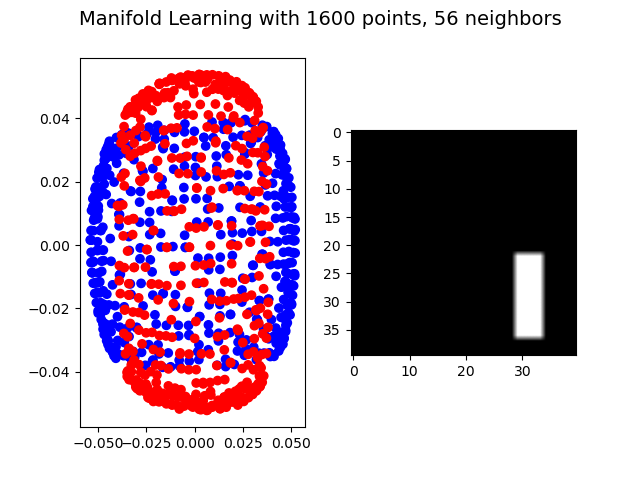

In [79]:
fig_bar = plt.figure()
fig_bar.suptitle("Manifold Learning with %i points, %i neighbors"
            % (data_bar.shape[0], n_neighbors), fontsize=14)
vis_both = VIS_Bars(data=data_bar, proj=Y_bar, fig_vis=fig_bar, 
                    image_size=image_size, both=True)

<ipython-input-80-c20556b26d16>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_v_bar = plt.figure()


<IPython.core.display.Javascript object>


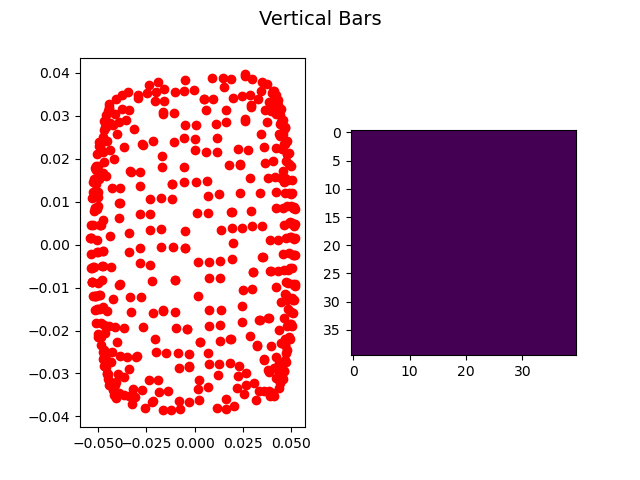

In [80]:
# Display the result of LLE regarding the vertical bars.
# The vertical bars are placed from 0 to 499 in the variable (data_bar).
fig_v_bar = plt.figure()
fig_v_bar.suptitle("Vertical Bars", fontsize=14)
vis_v = VIS_Bars(data=data_bar[:,:500], proj=Y_bar[:,:500], fig_vis=fig_v_bar, 
                    image_size=image_size, both=False) # fill this part

<ipython-input-81-9f254790e07d>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_h_bar = plt.figure()


<IPython.core.display.Javascript object>


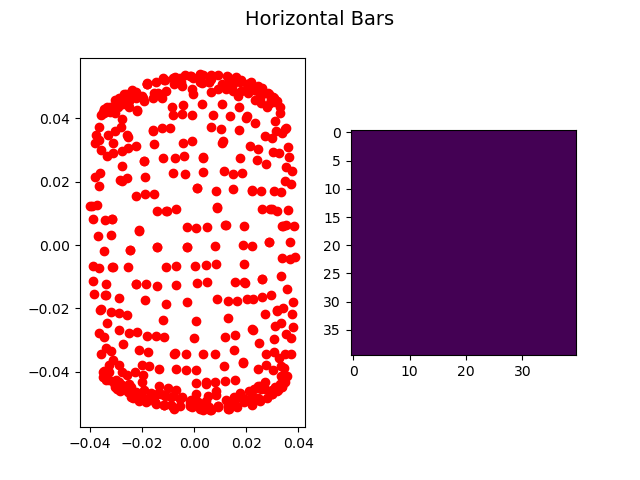

In [81]:
# Display the result of LLE regarding the horizontal bars.
# The vertical bars are placed from 500 to 999 in the variable (data_bar).
fig_h_bar = plt.figure()
fig_h_bar.suptitle("Horizontal Bars", fontsize=14)
vis_h = VIS_Bars(data=data_bar[:,500:], proj=Y_bar[:,500:], fig_vis=fig_h_bar, 
                    image_size=image_size, both=False) # fill this part

### <span style="color:red">============ End of Assignment 7 =========== </span>
<span style="color:red">